In [1]:
import cdsapi
import climetlab as cml
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopy
import xarray as xr
import pandas as pd

import csv
import os
import pickle

import scipy
import sklearn 
from sklearn.cluster import KMeans

import seaborn as sns

In [2]:
sns.set_theme(style="ticks")


In [3]:
with open("entry_table.dat", "rb") as f:
    final_table = pickle.load(f) 

In [9]:
ft = pd.read_csv("../../a/era5_data/final_table.csv")
print(ft)

                                               Location  Day  Month  Year  \
0                          geometry                 ...   30      1  2002   
1                          geometry                 ...   30      1  2002   
2                          geometry                 ...    9      3  2002   
3                          geometry                 ...   20      7  2002   
4                          geometry                 ...   28      8  2002   
...                                                 ...  ...    ...   ...   
1827                       geometry                 ...    1      5  2023   
1828                       geometry                 ...    1      5  2023   
1829                       geometry                 ...    1      5  2023   
1830                       geometry               ad...    1      5  2023   
1831                       geometry                 ...   22      5  2023   

        ID           Event  
0        0       Ice Storm  
1        1       

In [4]:
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

In [5]:
all_states = []
for i in states:
    state_info = []
    for j in final_table:
        if i in str(j['Location'].address):
            state_info.append(j)
    all_states.append(state_info)

In [6]:
state_dict = {}
for i in range(len(states)):
    state_dict[states[i]] = all_states[i]

print(state_dict)

{'Alaska': [], 'Alabama': [{'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '03', 'Month': '01', 'Year': '2022', 'ID': 2}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '16', 'Month': '01', 'Year': '2022', 'ID': 5}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '12', 'Month': '03', 'Year': '2022', 'ID': 21}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '31', 'Month': '03', 'Year': '2022', 'ID': 30}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '30', 'Month': '11', 'Year': '2022', 'ID': 81}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.

In [14]:
for i in final_table:
    print(i)

{'Location':                       geometry                              address
0  POINT (-119.99194 38.05694)  Tuolumne, California, United States, 'Day': '02', 'Month': '01', 'Year': '2022', 'ID': 0}
{'Location':                      geometry                 address
0  POINT (-83.11374 32.32938)  Georgia, United States, 'Day': '03', 'Month': '01', 'Year': '2022', 'ID': 1}
{'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '03', 'Month': '01', 'Year': '2022', 'ID': 2}
{'Location':                      geometry                     address
0  POINT (-89.73485 32.97153)  Mississippi, United States, 'Day': '03', 'Month': '01', 'Year': '2022', 'ID': 3}
{'Location':                      geometry                 address
0  POINT (-83.11374 32.32938)  Georgia, United States, 'Day': '16', 'Month': '01', 'Year': '2022', 'ID': 4}
{'Location':                      geometry                 address
0  POINT (-86.82953 33

                                  time         t2m        tp
latitude longitude                                          
50.50    227.75    2022-01-02 12:00:00  278.212128  0.000570
         228.00    2022-01-02 12:00:00  278.532562  0.000614
         228.25    2022-01-02 12:00:00  278.747192  0.000538
         228.50    2022-01-02 12:00:00  278.933838  0.000453
         228.75    2022-01-02 12:00:00  279.081604  0.000307
...                                ...         ...       ...
25.75    251.50    2022-01-02 12:00:00  284.482086  0.000000
         251.75    2022-01-02 12:00:00  283.116394  0.000000
         252.00    2022-01-02 12:00:00  283.825684  0.000000
         252.25    2022-01-02 12:00:00  282.113159  0.000000
         252.50    2022-01-02 12:00:00  280.025757  0.000000

[10000 rows x 3 columns]


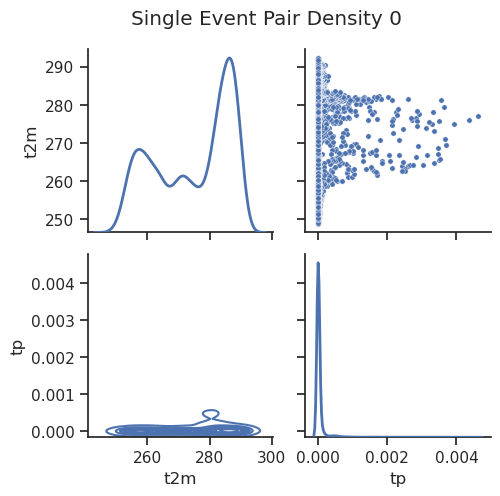

In [8]:
count = 0
for i in final_table:
    if count == 10:
        break
    means = xr.open_dataset('../../a/state_means/global_mean.nc')

    file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
    x = xr.open_dataset('../datafiles/' + file_name)
    currLocation = i['Location']
    datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'

    # print(i['Year'] + '-' + i['Month'] + '-' + i['Day'])

    

    # print(state_mean.time)

    lat = currLocation.geometry.y.values[0]
    lon = currLocation.geometry.x.values[0] + 360.
    # print(lat,lon)
    # print(means)
    # print(x)
    state_mean = means.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5),time=i['Year'] + '-' + i['Month'] + '-01')
    locate =  x.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5), time=datetime)

    # state_mean.t2m.plot()

    # print(state_mean)
    # print(locate)

    # print(state_mean.t2m.to_numpy())
    # print(locate.t2m.to_numpy())


    # wind_mag = np.sqrt(np.square(locate.u10.to_numpy())+np.square(locate.v10.to_numpy()))
    # wind_mean = np.sqrt(np.square(state_mean.u10.to_numpy())+np.square(state_mean.v10.to_numpy()))

    anom_t2m = locate.t2m.to_dataframe() - state_mean.t2m.to_dataframe()

    anom_sf = locate.sf.to_dataframe() - state_mean.sf.to_dataframe()

    # anom_wind = wind_mag - wind_mean

    raw_t2m = locate.t2m.to_dataframe()
    raw_sf = locate.sf.to_dataframe()

    # print(anom_t2m)
    # print(anom_sf)
    # print(anom_t2m)

    raw_tp = locate.tp.to_dataframe()

    raw_tp_col = raw_tp["tp"]
    raw_pd = pd.concat([raw_t2m, raw_tp_col.rename("tp")], axis=1)

    # raw_sf_col = raw_sf["sf"]
    # raw_pd = pd.concat([raw_t2m, raw_sf_col.rename("sf")], axis=1)

    anom_sf_col = anom_sf["sf"]
    anom_pd = pd.concat([anom_t2m, anom_sf_col.rename("sf")], axis=1)

    print(raw_pd)
    # print(anom_pd)


    

    g = sns.PairGrid(raw_pd, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Single Event Pair Density " + str(count))

    plt.savefig("../visuals/tests/single_event_pair_density_" + str(count) + ".png")

    count +=1

    break




    
    


{'California':                                   time         t2m        tp
latitude longitude                                          
50.50    227.75    2022-01-02 12:00:00  278.212128  0.000570
         228.00    2022-01-02 12:00:00  278.532562  0.000614
         228.25    2022-01-02 12:00:00  278.747192  0.000538
         228.50    2022-01-02 12:00:00  278.933838  0.000453
         228.75    2022-01-02 12:00:00  279.081604  0.000307
...                                ...         ...       ...
21.75    253.25    2023-02-25 12:00:00  293.822906  0.000000
         253.50    2023-02-25 12:00:00  294.208832  0.000000
         253.75    2023-02-25 12:00:00  294.735474  0.000000
         254.00    2023-02-25 12:00:00  295.104004  0.000000
         254.25    2023-02-25 12:00:00  294.578796  0.000000

[90000 rows x 3 columns], 'Georgia':                                   time         t2m            tp
latitude longitude                                              
44.75    264.50    2022-

/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1280: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


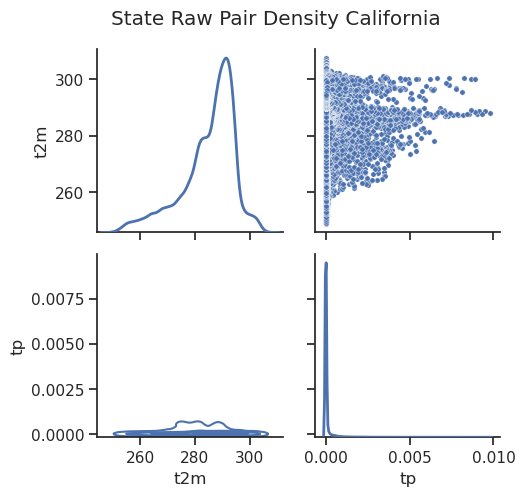

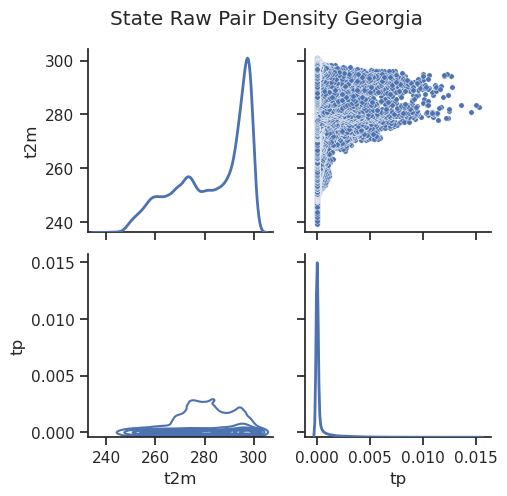

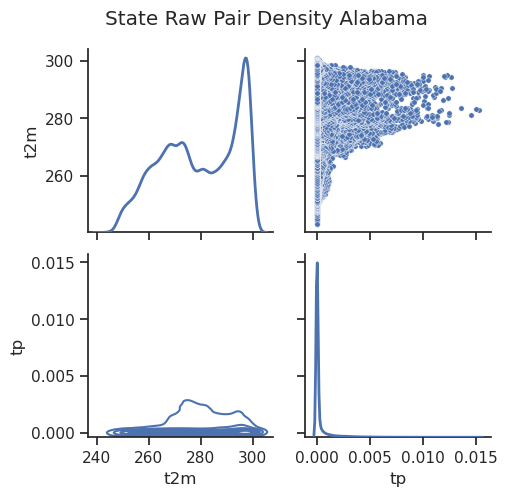

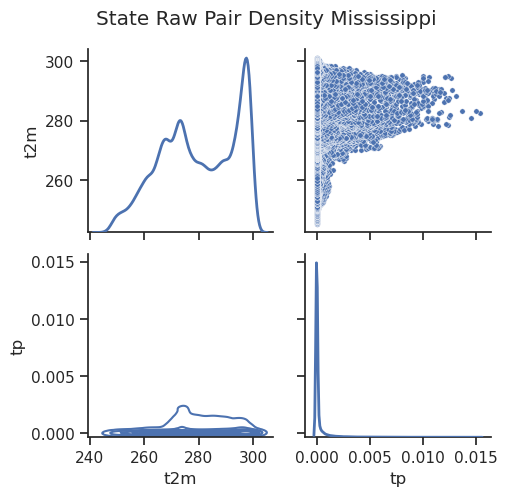

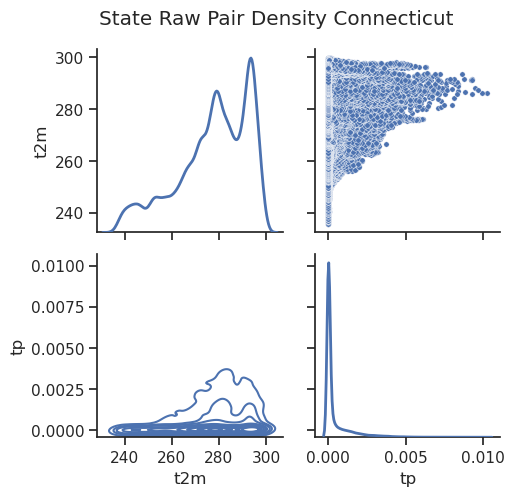

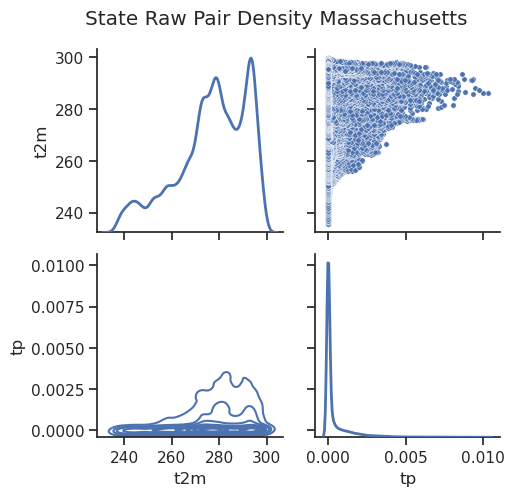

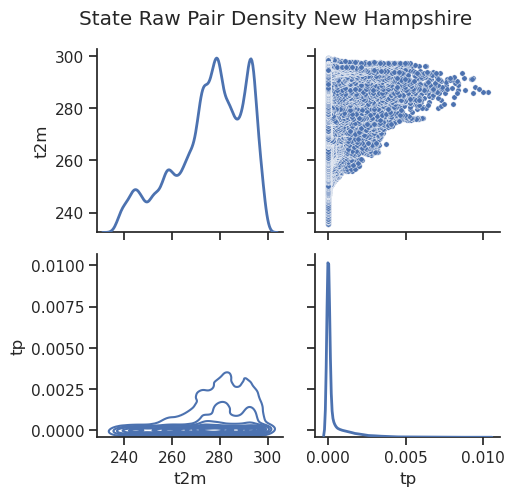

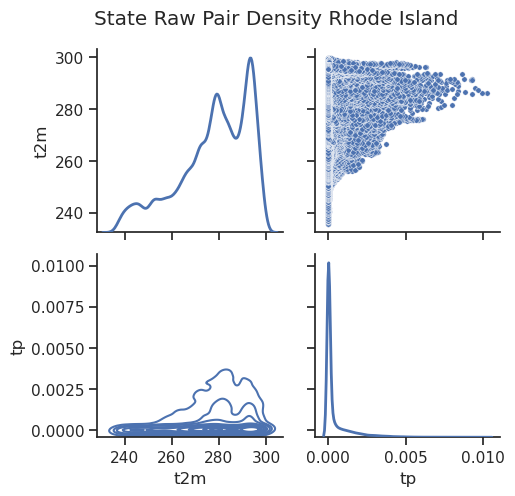

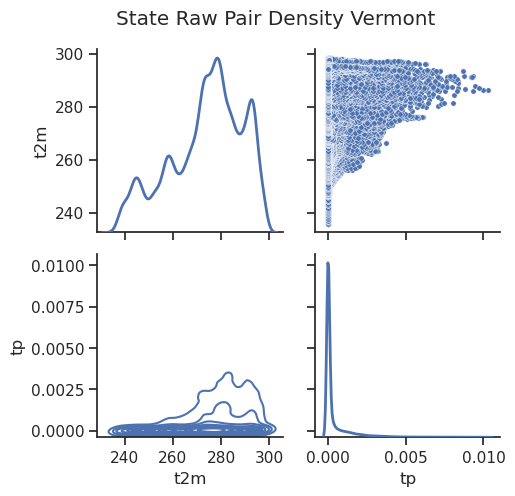

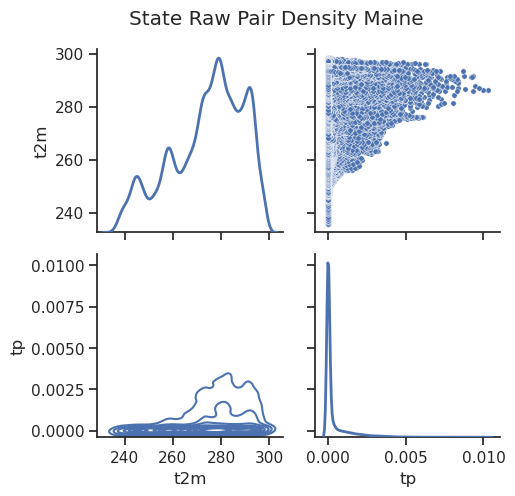

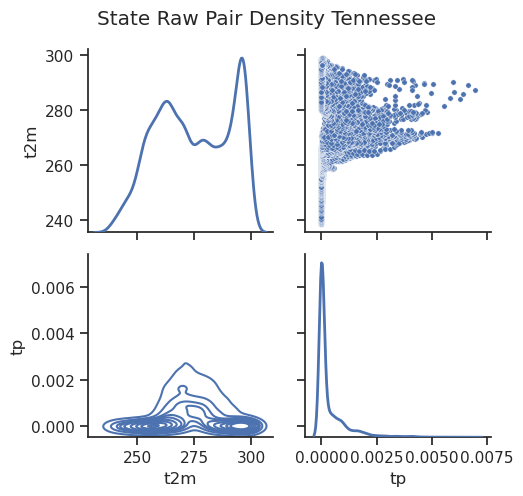

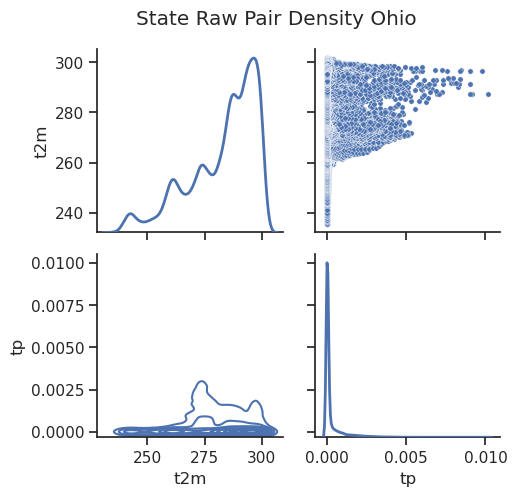

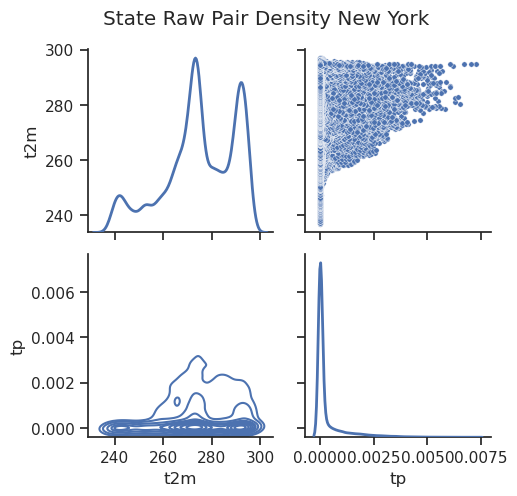

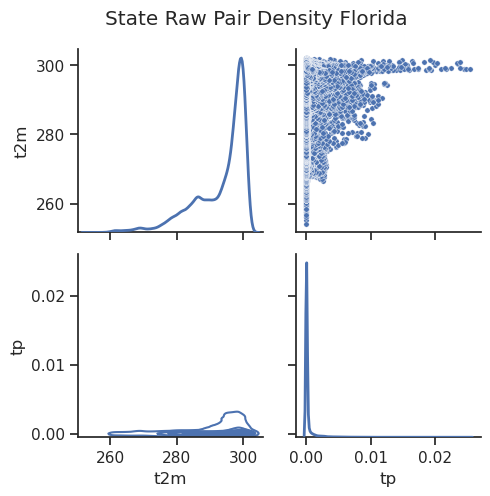

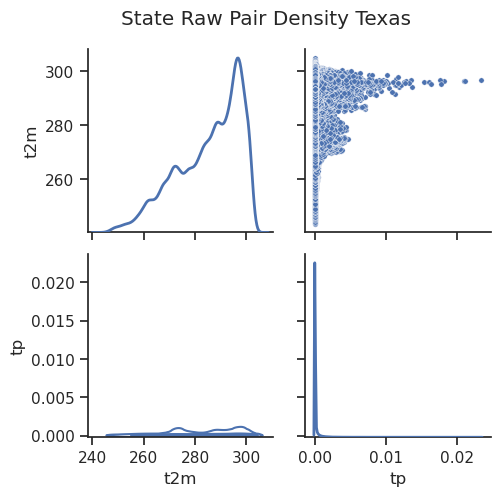

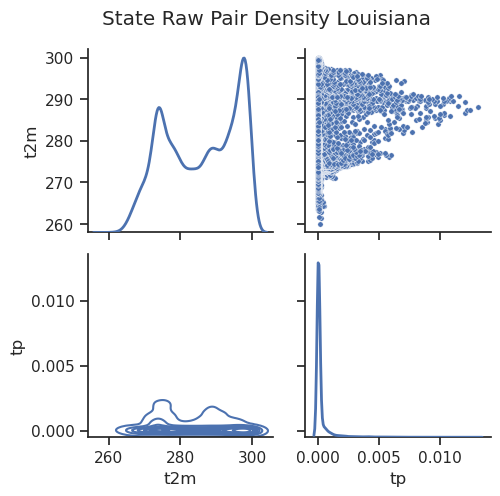

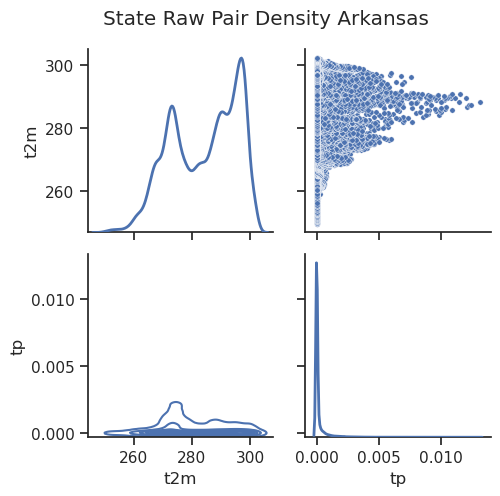

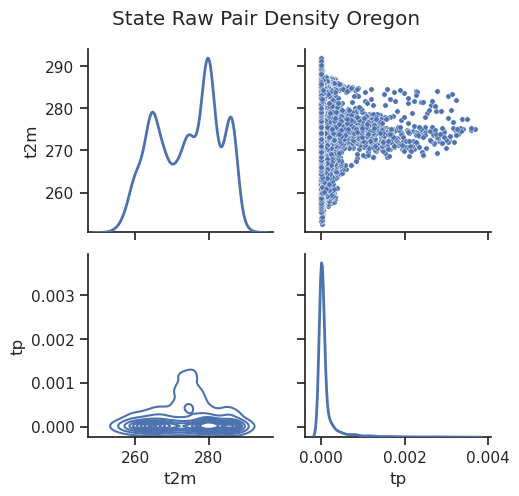

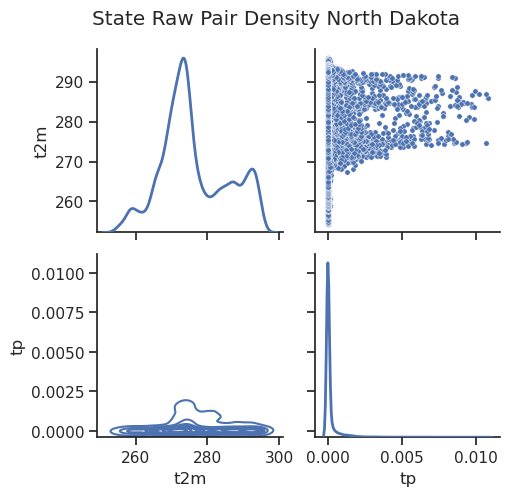

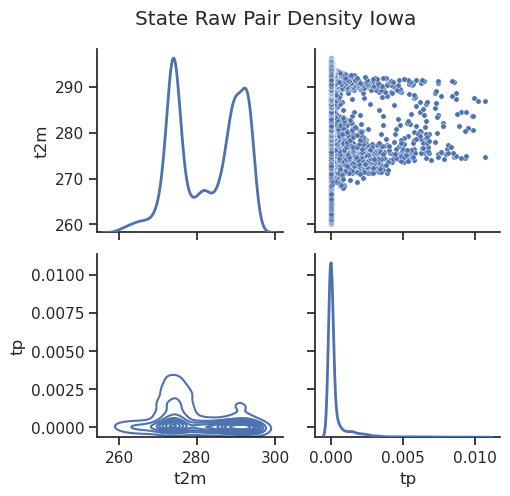

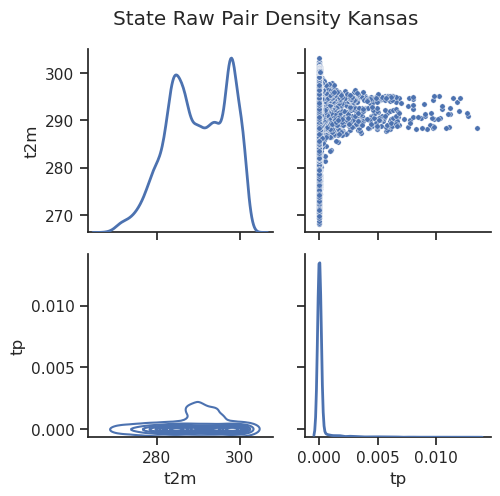

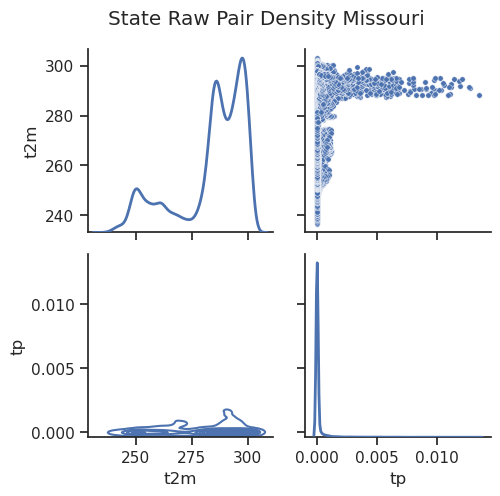

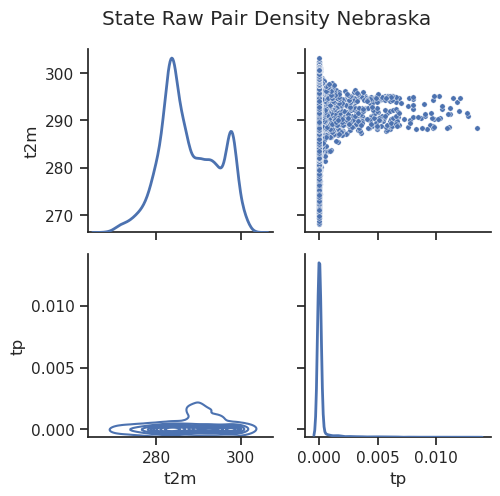

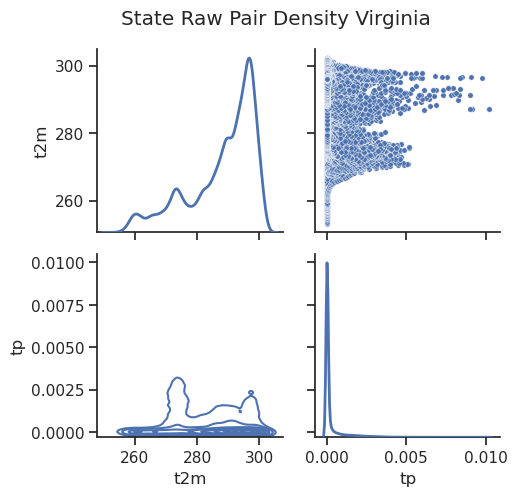

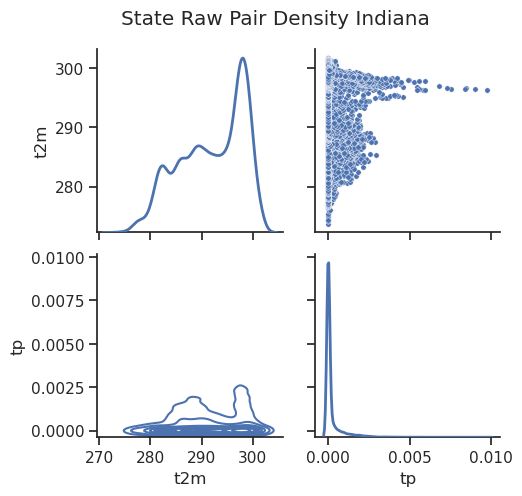

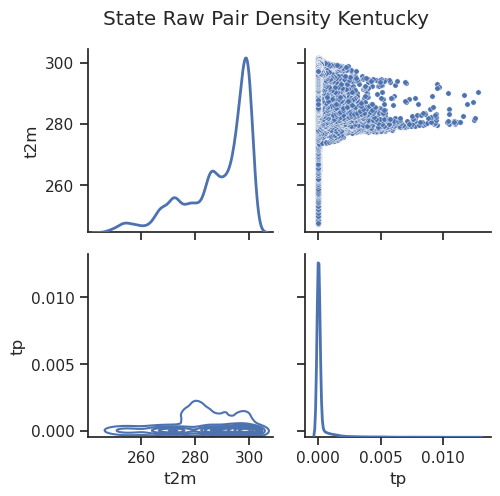

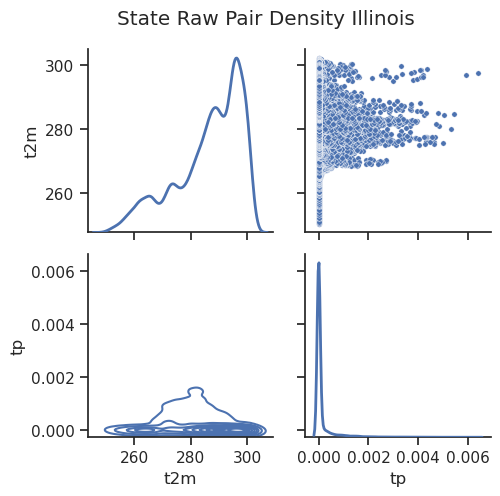

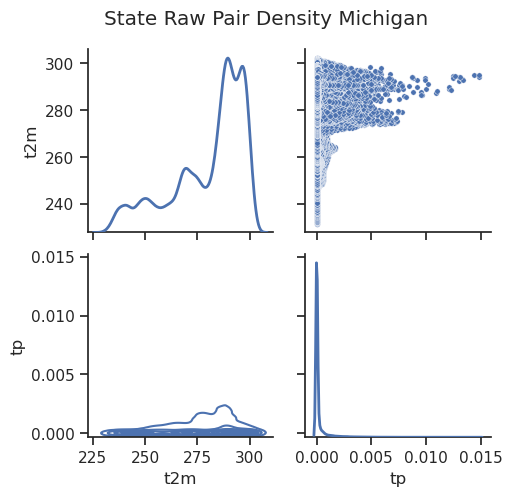

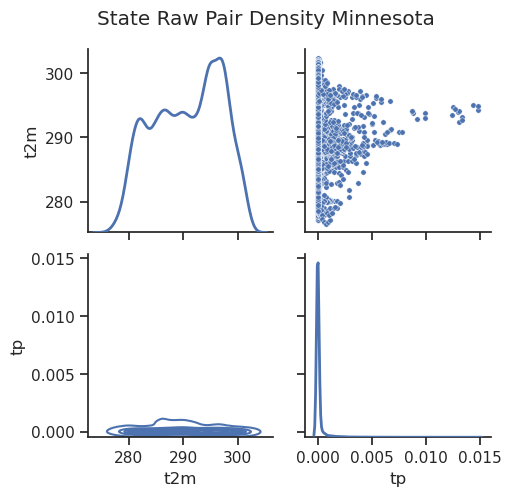

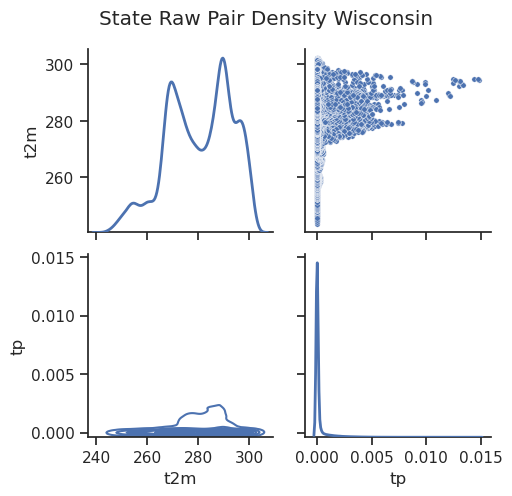

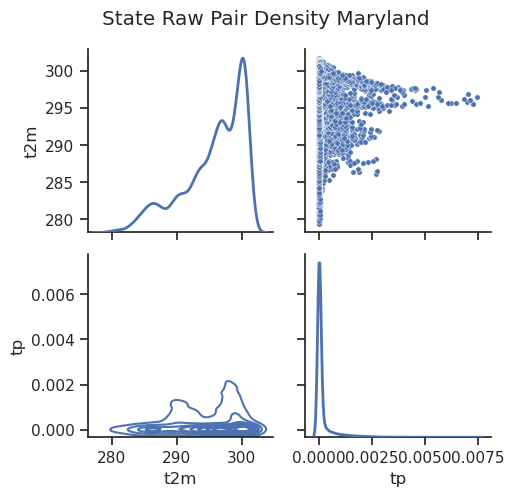

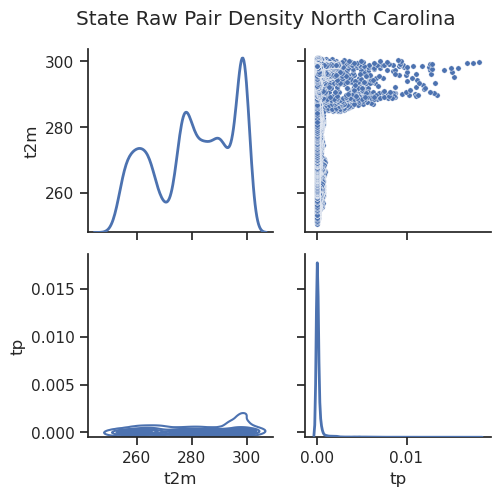

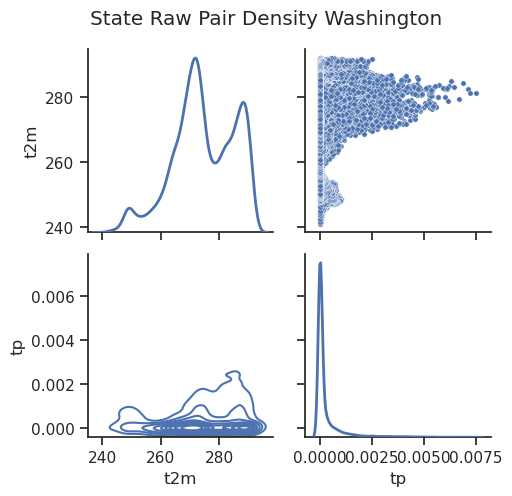

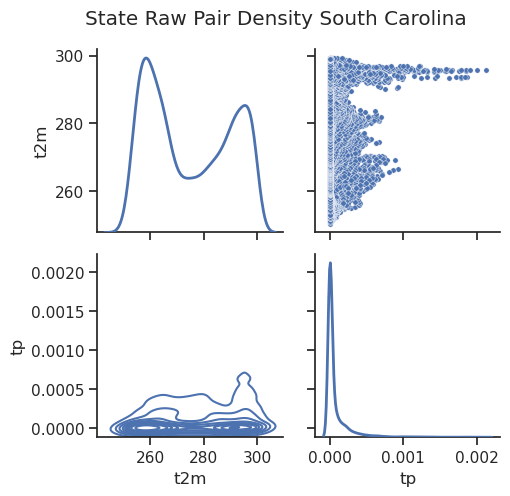

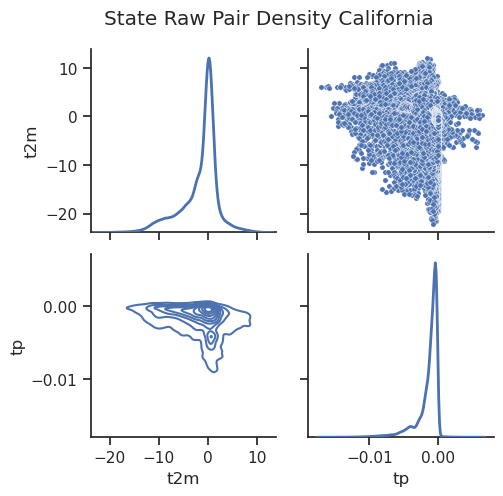

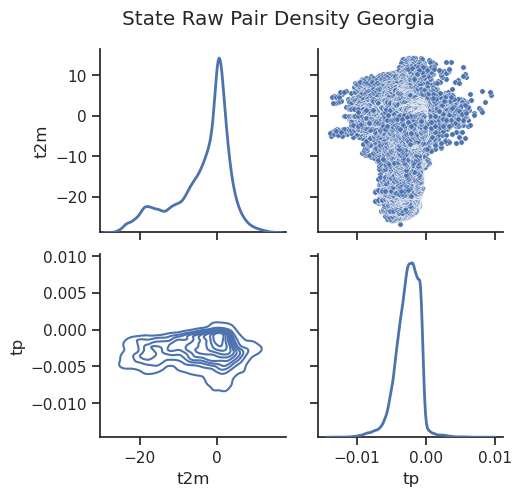

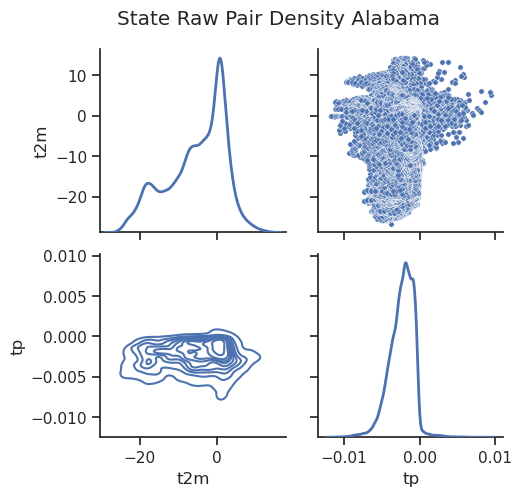

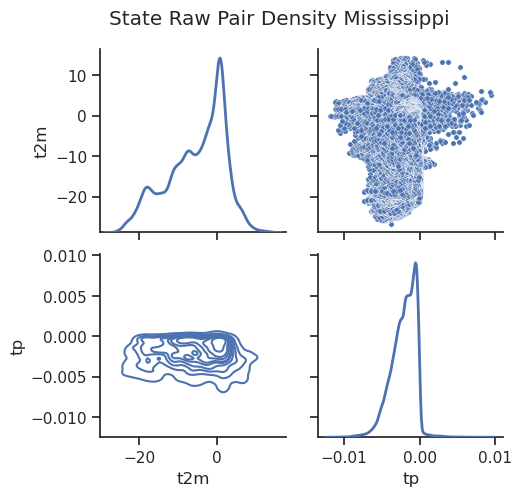

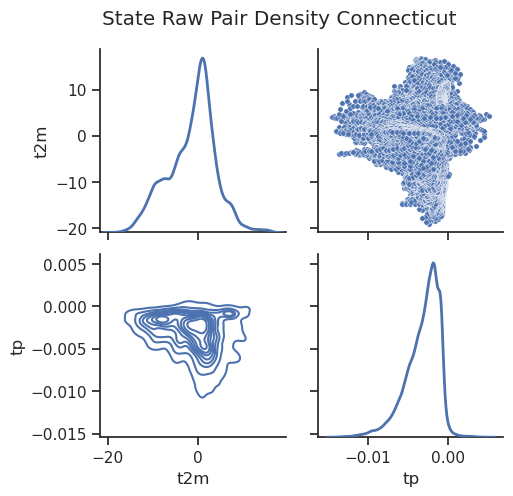

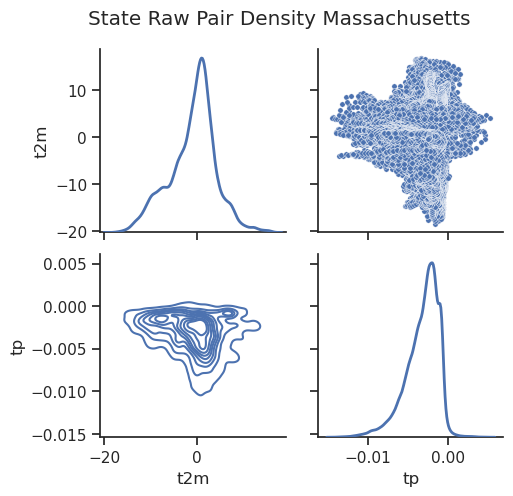

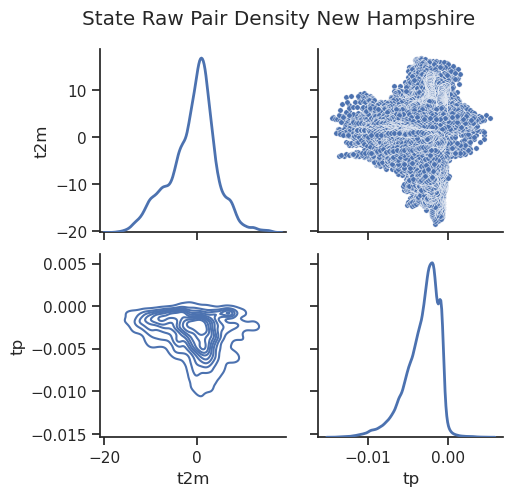

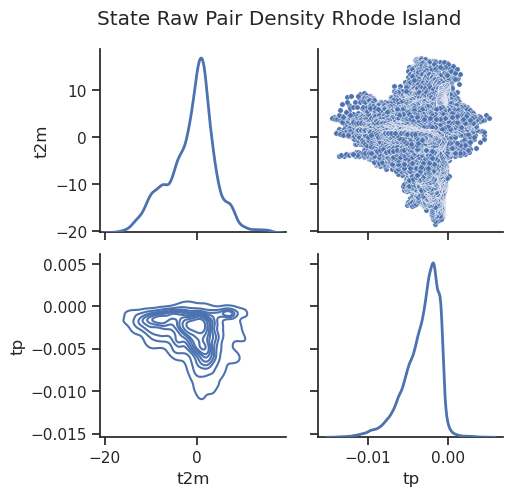

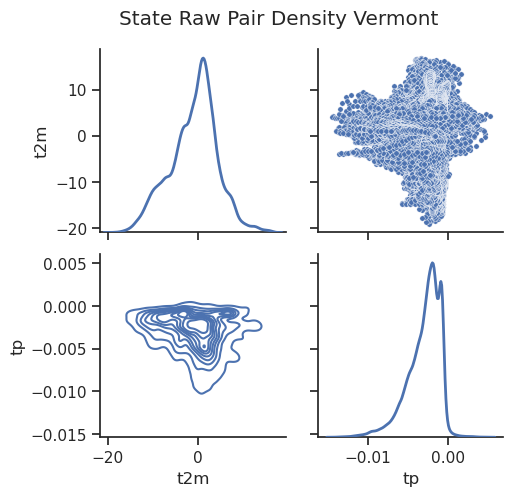

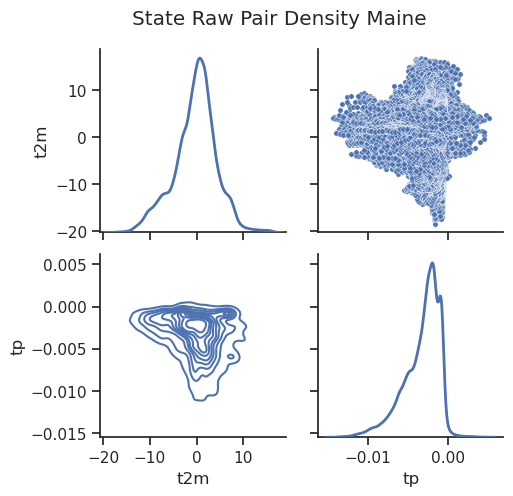

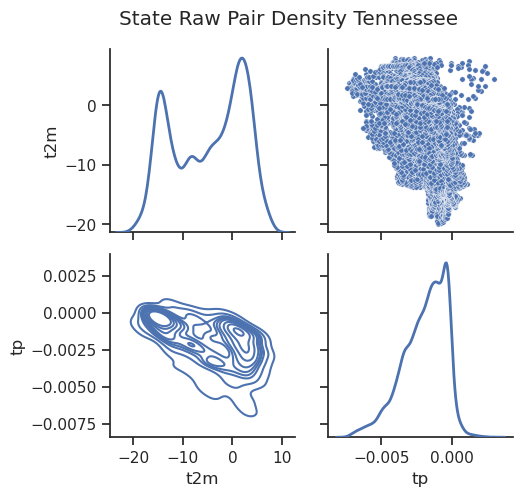

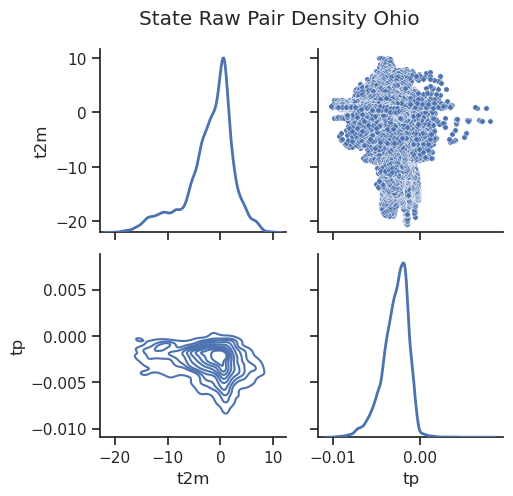

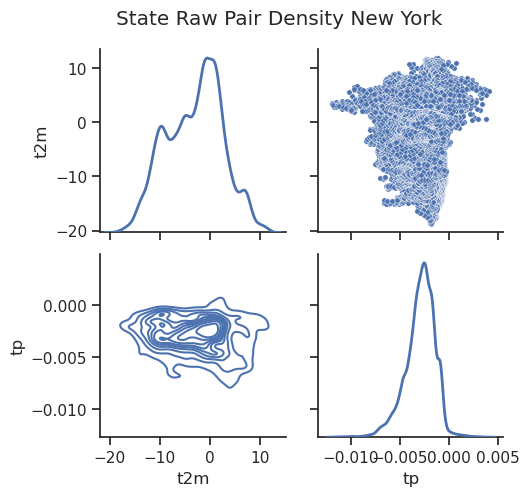

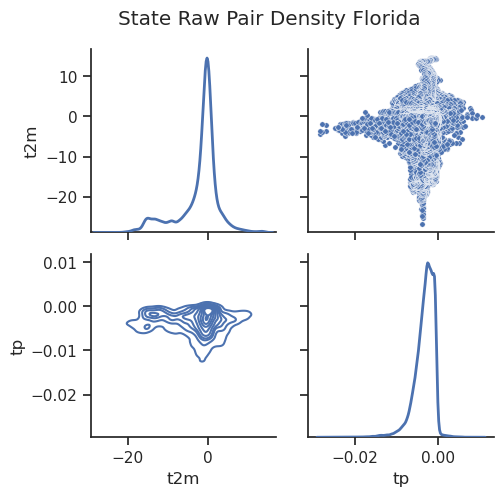

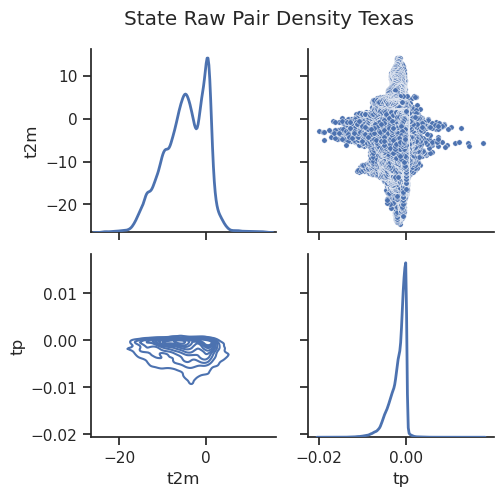

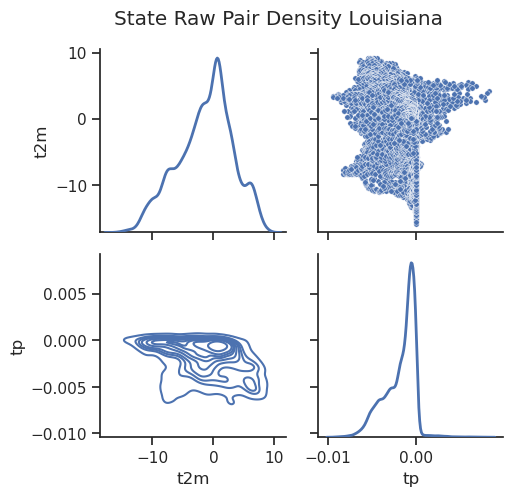

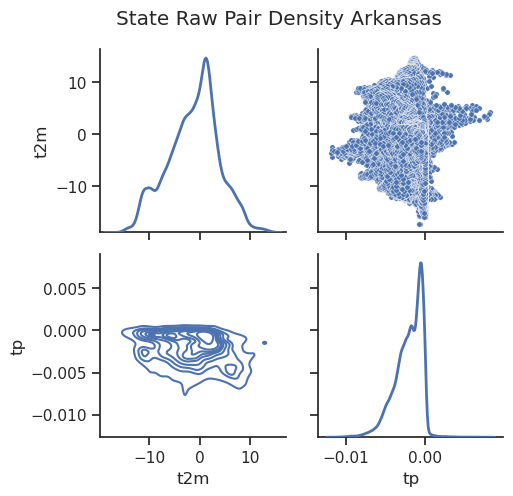

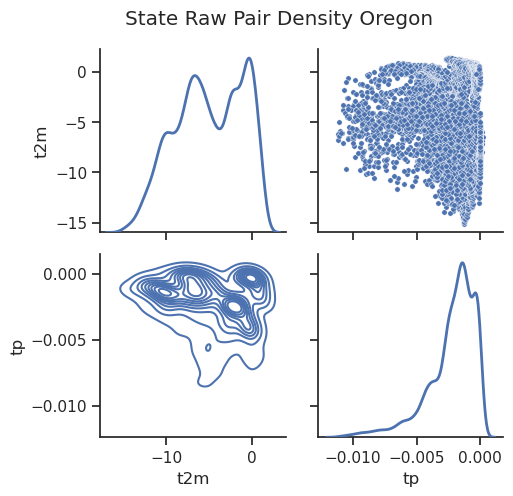

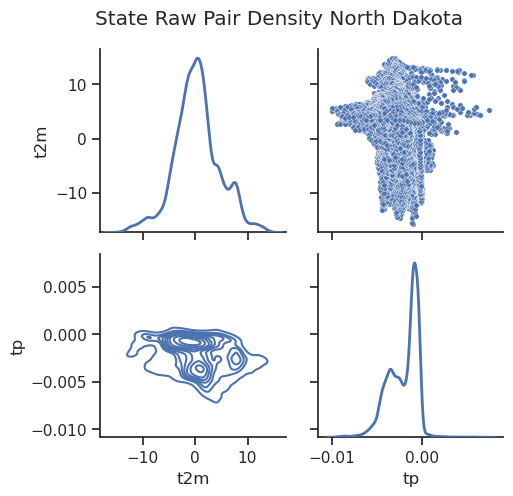

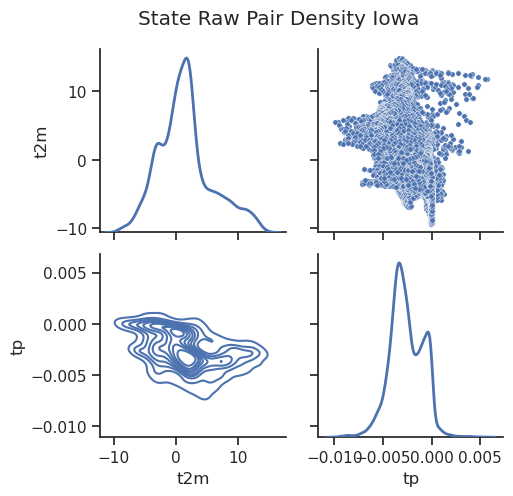

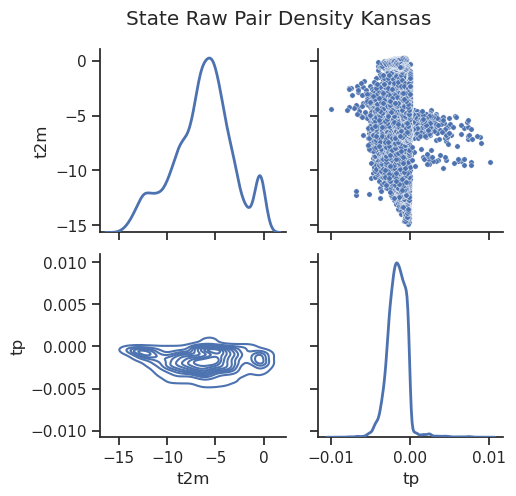

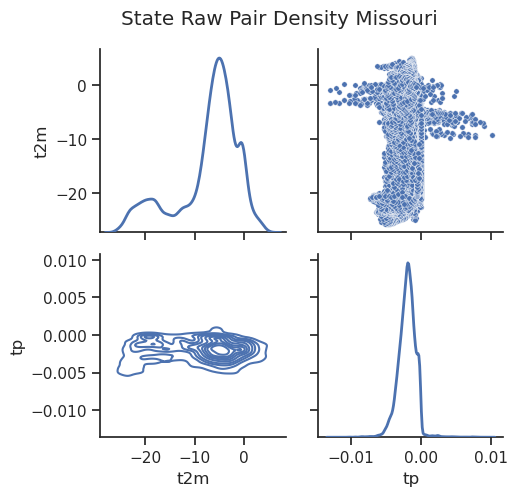

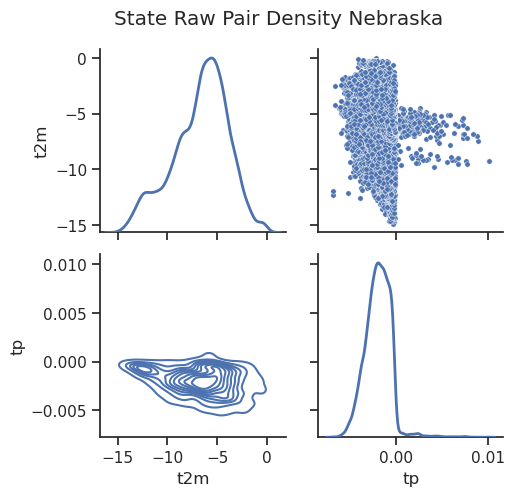

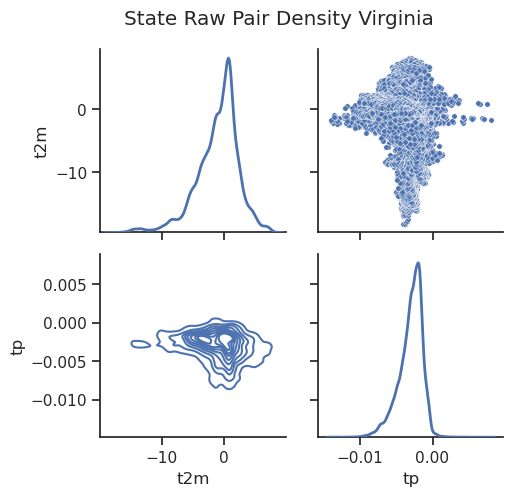

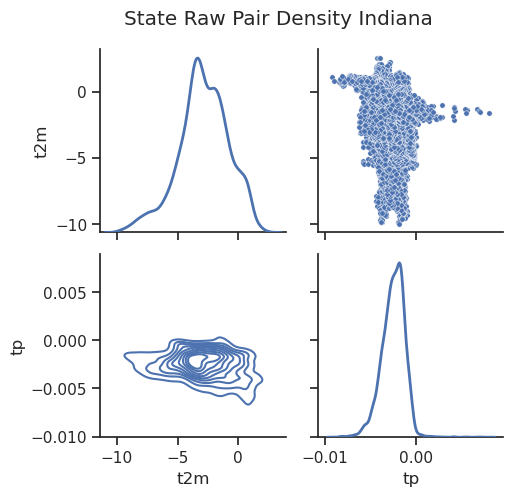

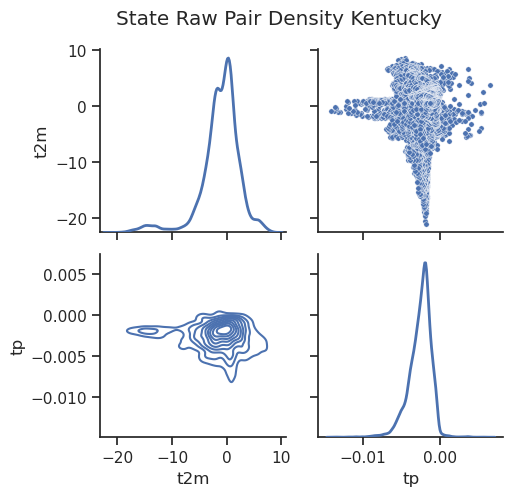

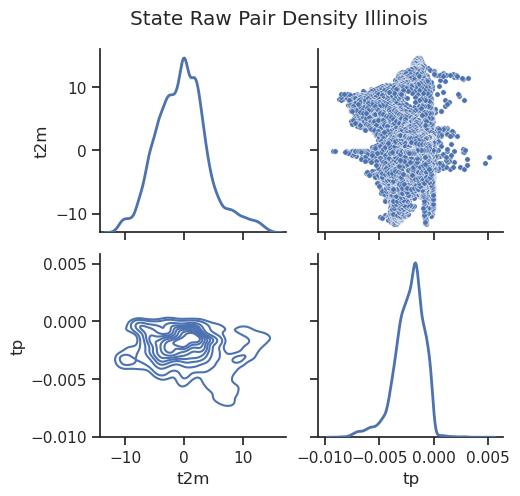

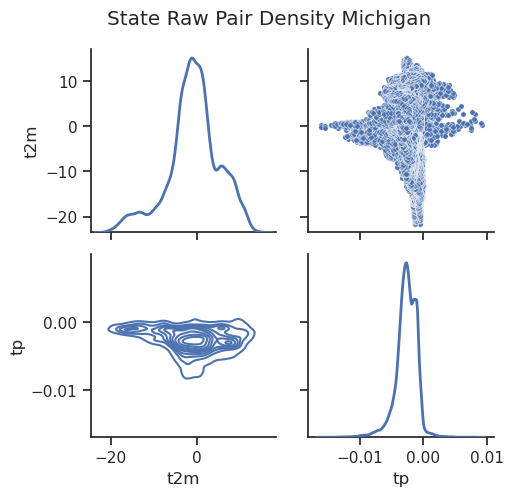

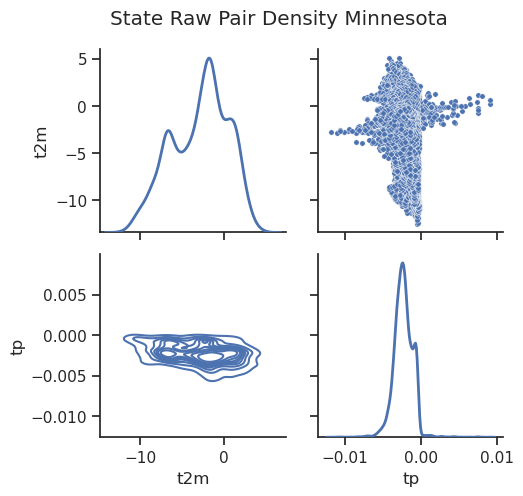

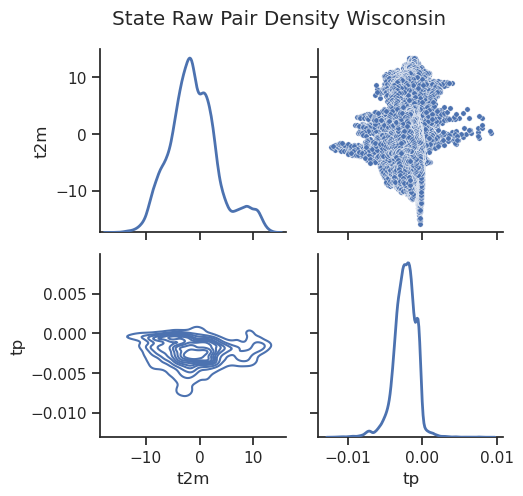

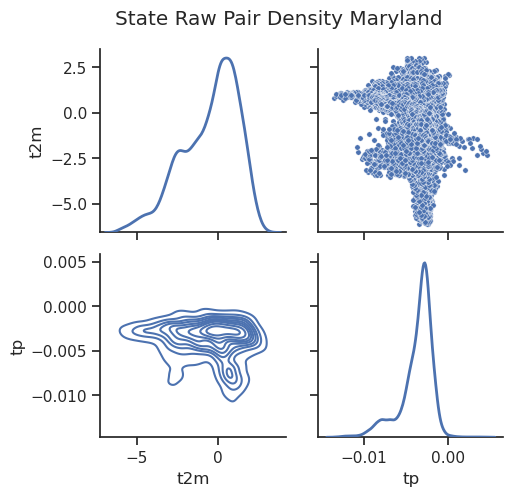

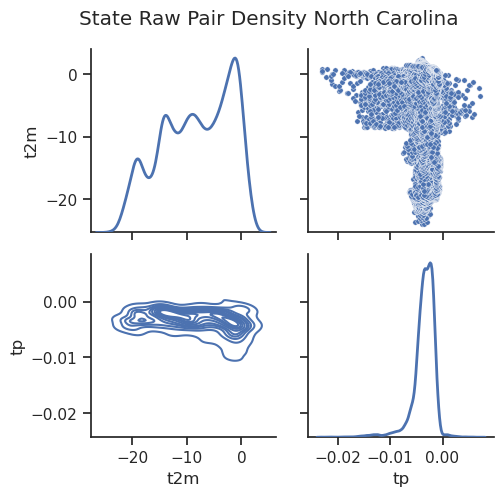

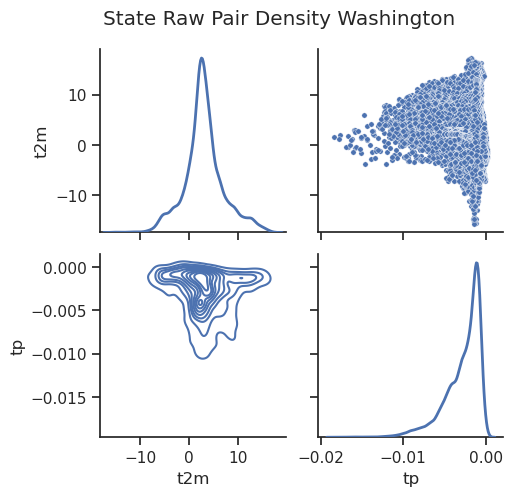

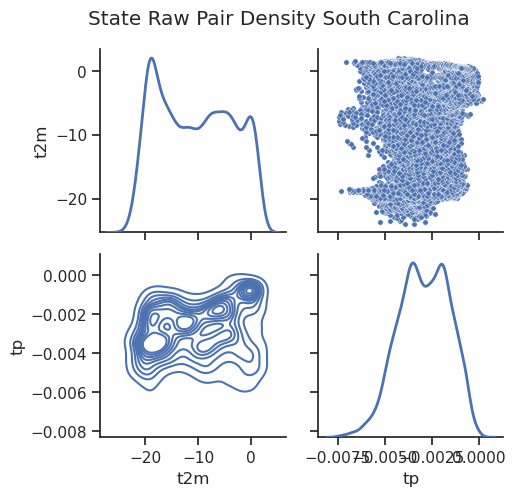

In [7]:
state_data_raw = {}
state_data_anom = {}
for i in final_table:
    # print("run")
    means = xr.open_dataset('../../a/state_means/global_mean.nc')

    file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
    x = xr.open_dataset('../datafiles/' + file_name)
    currLocation = i['Location']
    datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'

    # print(i['Year'] + '-' + i['Month'] + '-' + i['Day'])

    # print(currLocation.address)

    for j in states:
        # print(j)
        if j in str(currLocation.address):
            
            # print(j)
            state_id = j
            break
        
        
        


    # print(state_mean.time)

    lat = currLocation.geometry.y.values[0]
    lon = currLocation.geometry.x.values[0] + 360.
    # print(lat,lon)
    # print(means)
    # print(x)
    state_mean = means.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5),time=i['Year'] + '-' + i['Month'] + '-01')
    locate =  x.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5), time=datetime)

    # state_mean.t2m.plot()

    # print(state_mean)
    # print(locate)

    # print(state_mean.t2m.to_numpy())
    # print(locate.t2m.to_numpy())


    # wind_mag = np.sqrt(np.square(locate.u10.to_numpy())+np.square(locate.v10.to_numpy()))
    # wind_mean = np.sqrt(np.square(state_mean.u10.to_numpy())+np.square(state_mean.v10.to_numpy()))

    anom_t2m = locate.t2m.to_dataframe() - state_mean.t2m.to_dataframe()

    anom_tp = locate.tp.to_dataframe() - state_mean.tp.to_dataframe()

    # anom_wind = wind_mag - wind_mean

    raw_t2m = locate.t2m.to_dataframe()
    raw_tp = locate.tp.to_dataframe()

    # print(anom_t2m)
    # print(anom_sf)
    # print(anom_t2m)

    raw_tp_col = raw_tp["tp"]
    raw_pd = pd.concat([raw_t2m, raw_tp_col.rename("tp")], axis=1)

    anom_tp_col = anom_tp["tp"]
    anom_pd = pd.concat([anom_t2m, anom_tp_col.rename("tp")], axis=1)

    # print(raw_pd)
    # print(anom_pd)

    if state_id in state_data_raw:
        combine = [state_data_raw[state_id],raw_pd]
        state_data_raw[state_id] = pd.concat(combine)
        combine2 = [state_data_anom[state_id],anom_pd]
        state_data_anom[state_id] = pd.concat(combine2)
    else:
        state_data_raw[state_id] = raw_pd
        state_data_anom[state_id] = anom_pd

    # print("Done")


# g = sns.PairGrid(anom_pd, diag_sharey=False)
# g.map_upper(sns.scatterplot, s=15)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=2)
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Single Event Pair Density" + count)

# plt.savefig("../visuals/tests/single_event_pair_density_" + str(count) + ".png")

print(state_data_raw)

for i in state_data_raw:
    print("Run")
    g = sns.PairGrid(state_data_raw[i], diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("State Raw Pair Density " + i)

    # plt.savefig("../visuals/tests/raw_pair_density_" + i + ".png")

for i in state_data_anom:
    g = sns.PairGrid(state_data_anom[i], diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("State Raw Pair Density " + i)

    # plt.savefig("../visuals/tests/anom_pair_density_" + i + ".png")

    
    


In [9]:
penguins = sns.load_dataset("penguins")

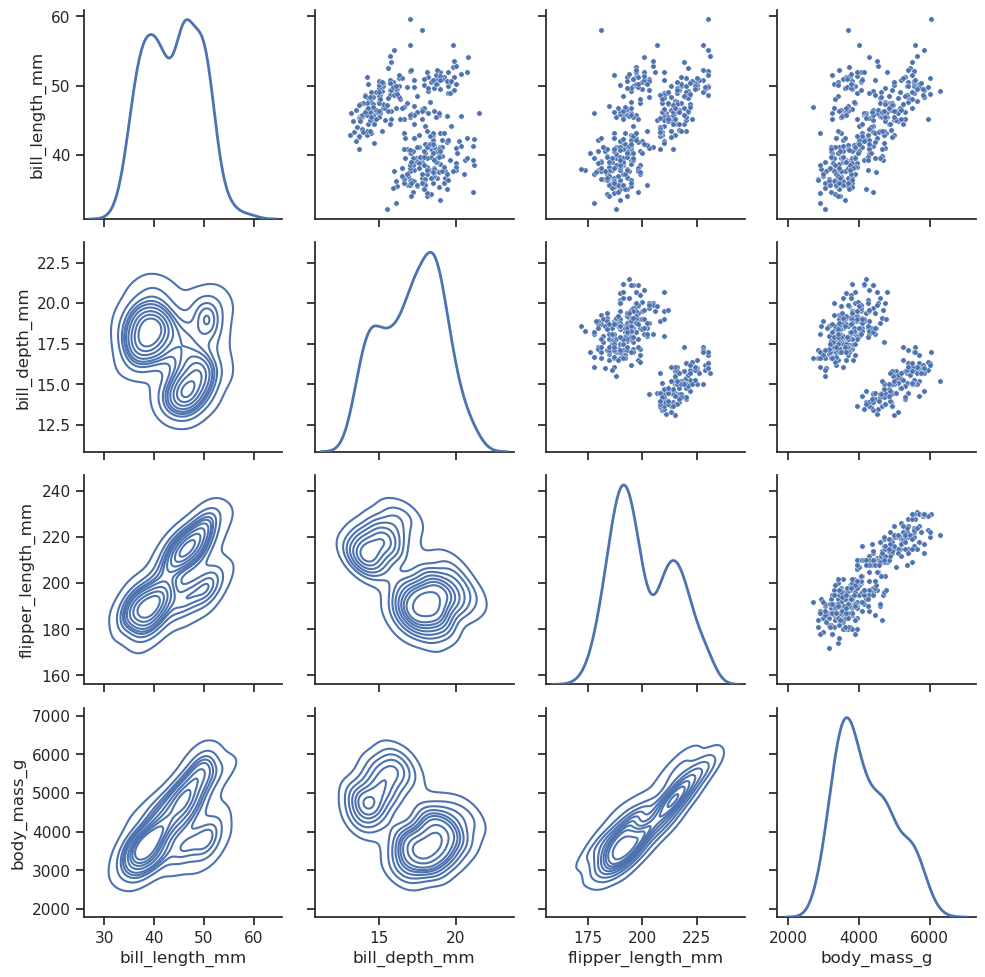

In [10]:
g = sns.PairGrid(penguins, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1696: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


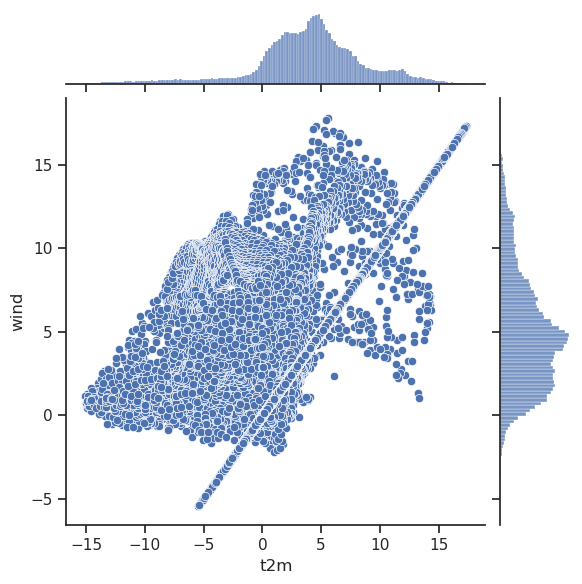

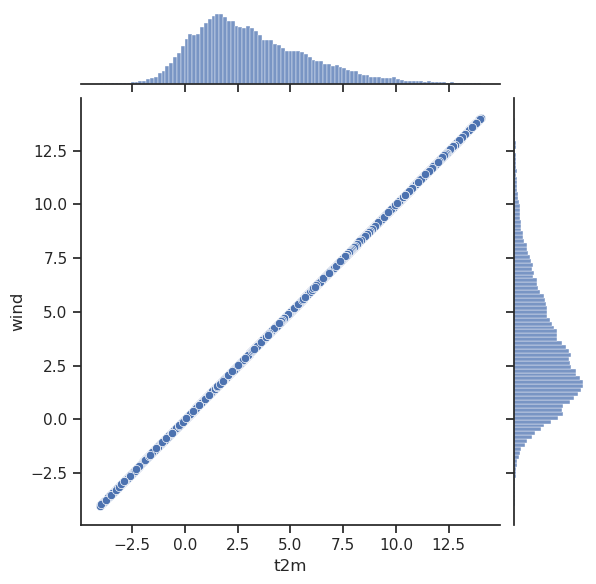

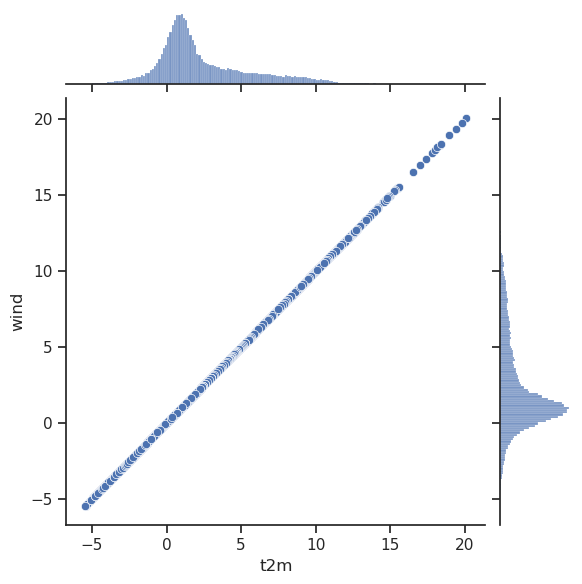

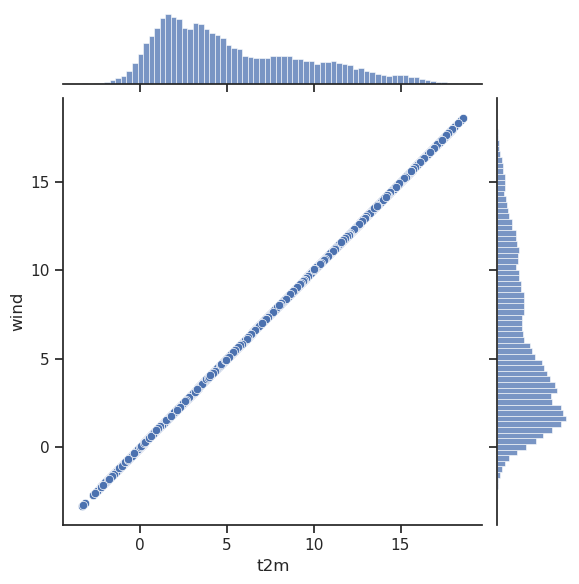

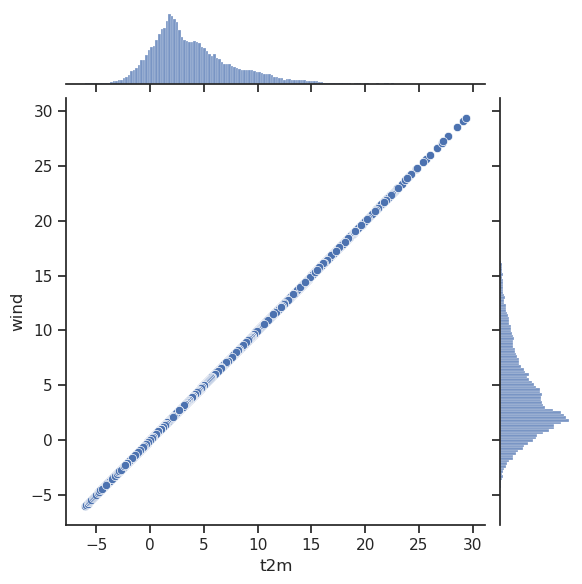

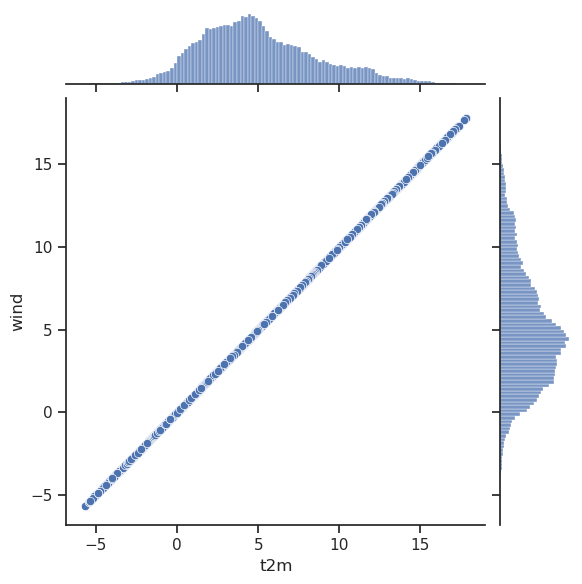

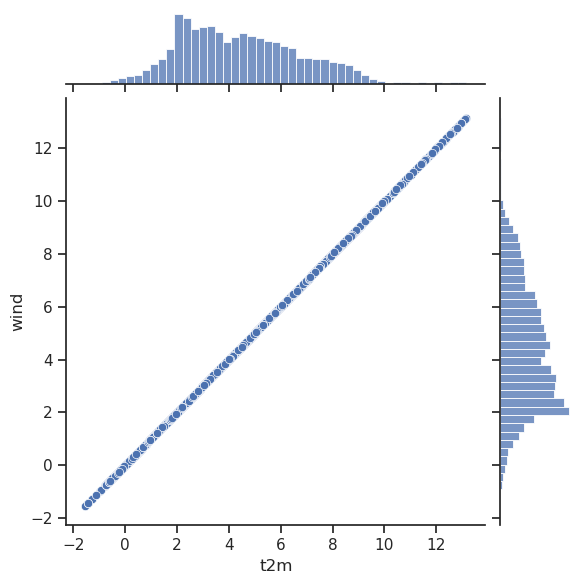

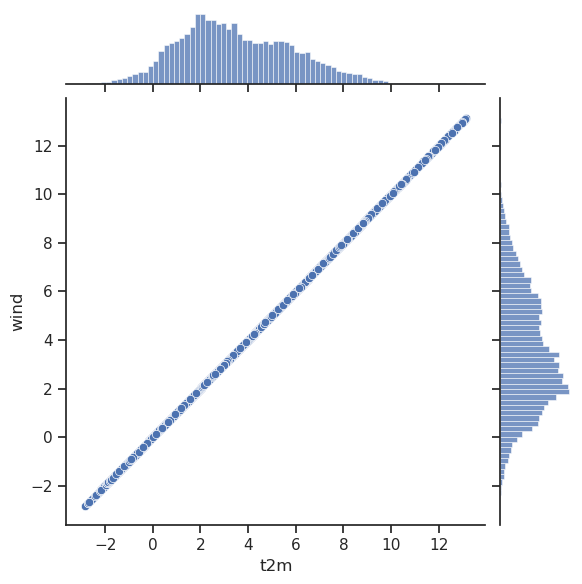

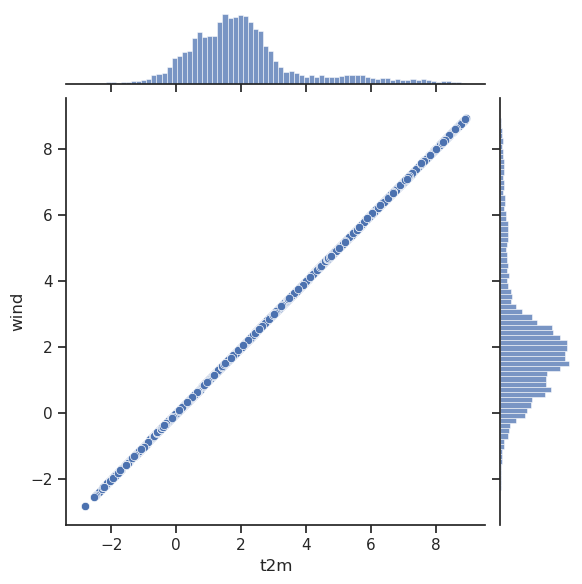

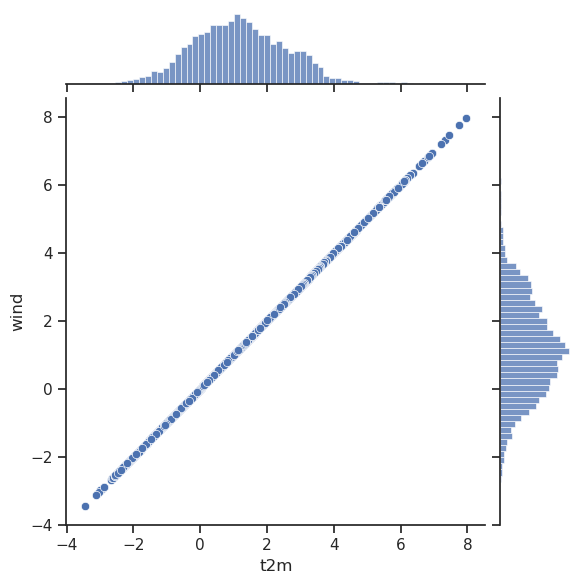

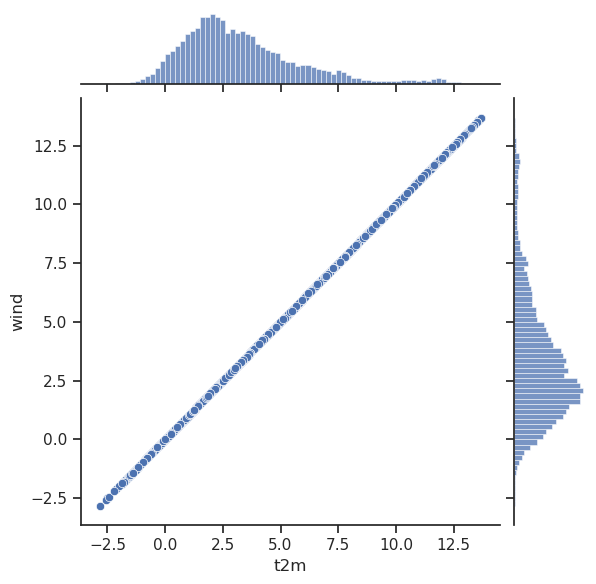

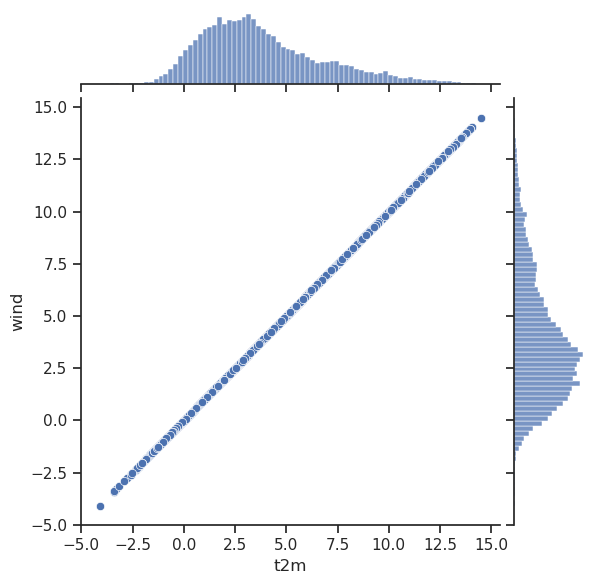

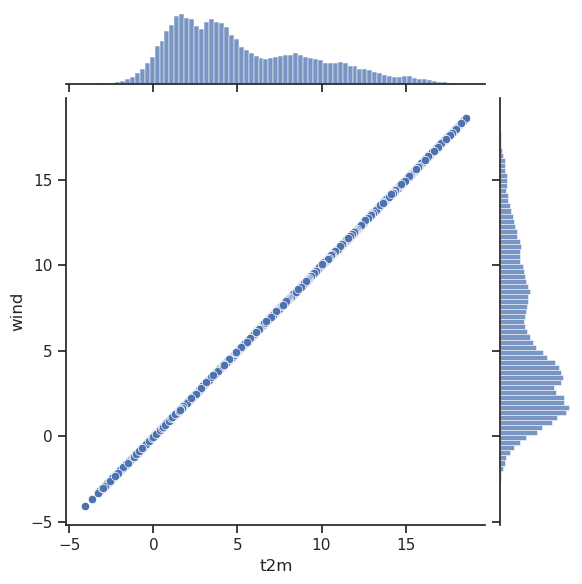

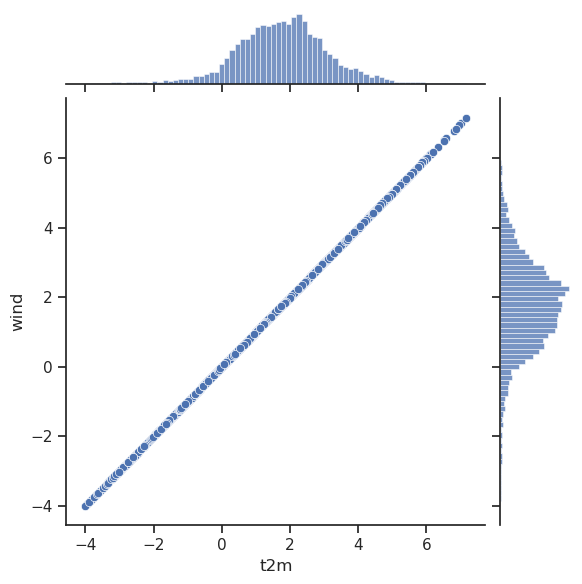

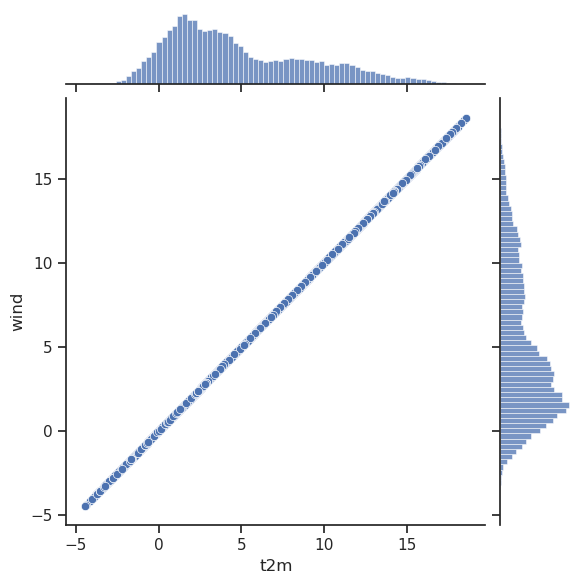

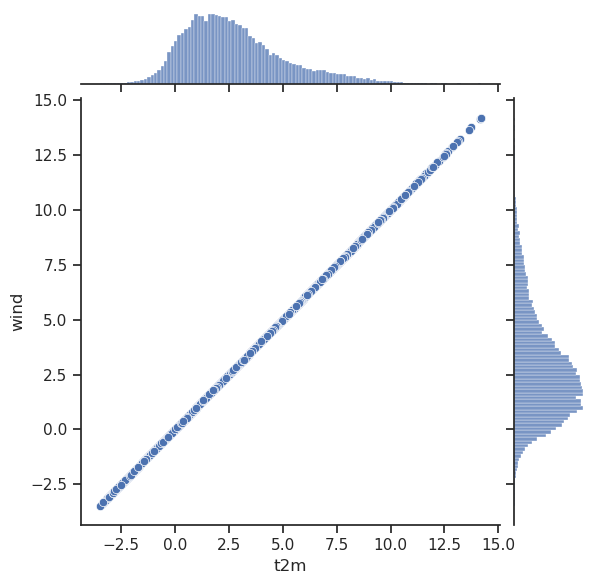

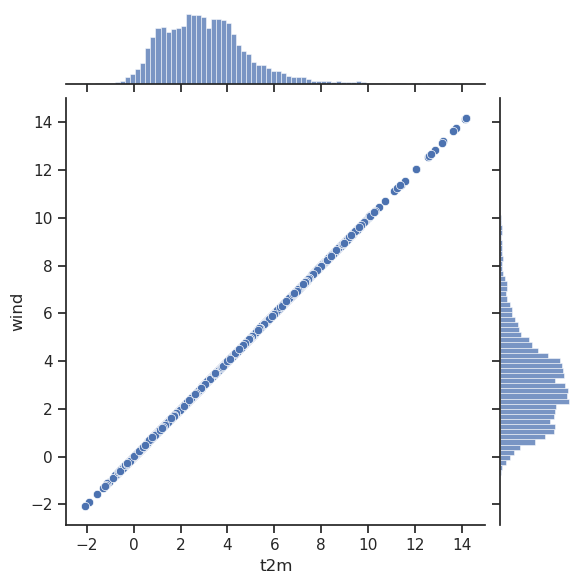

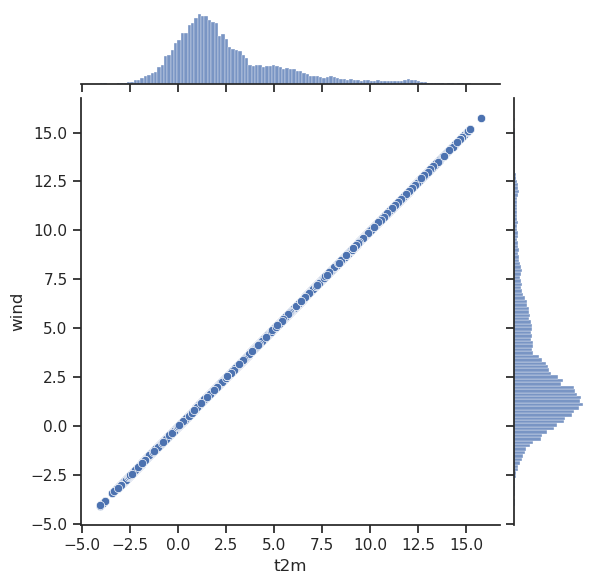

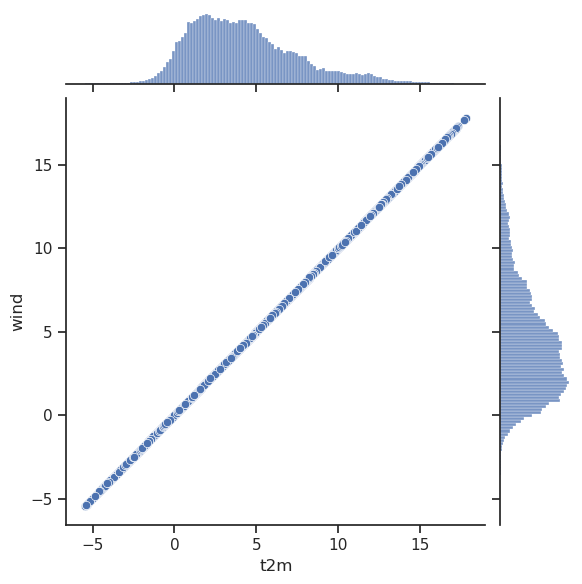

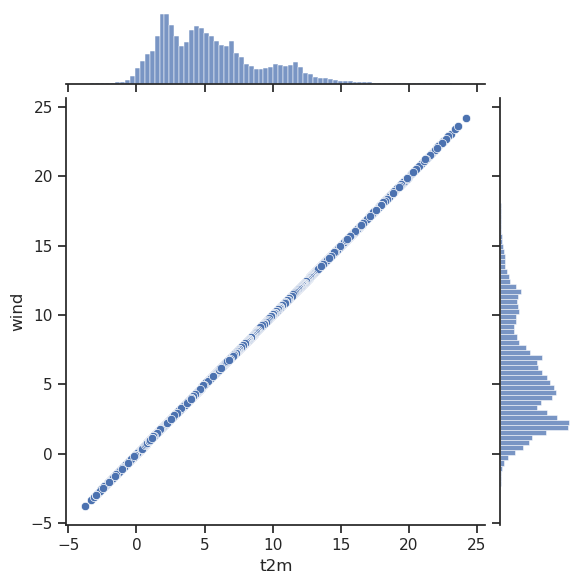

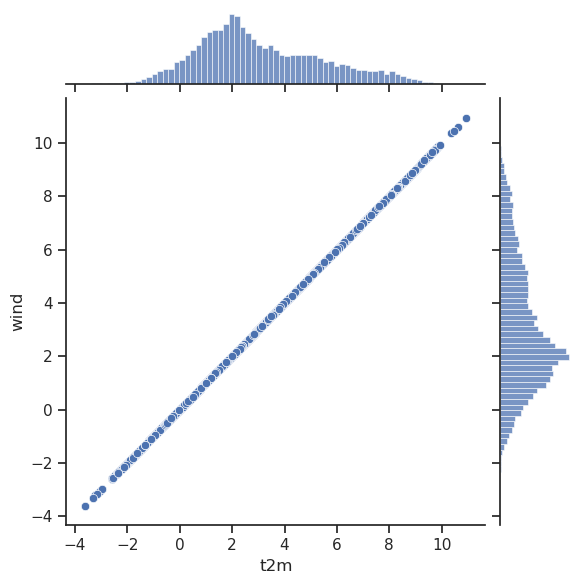

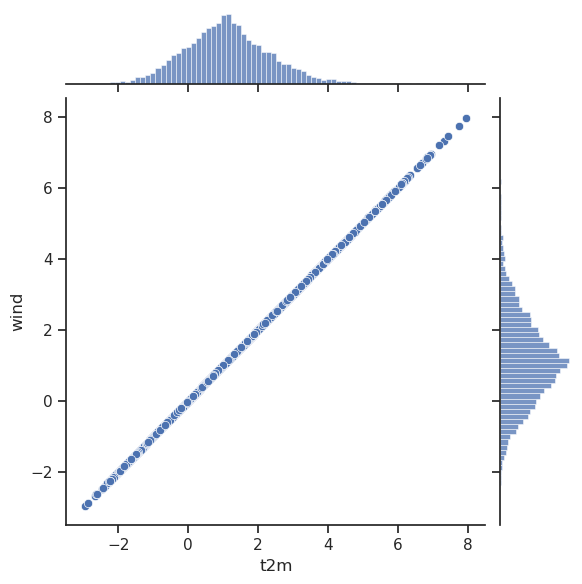

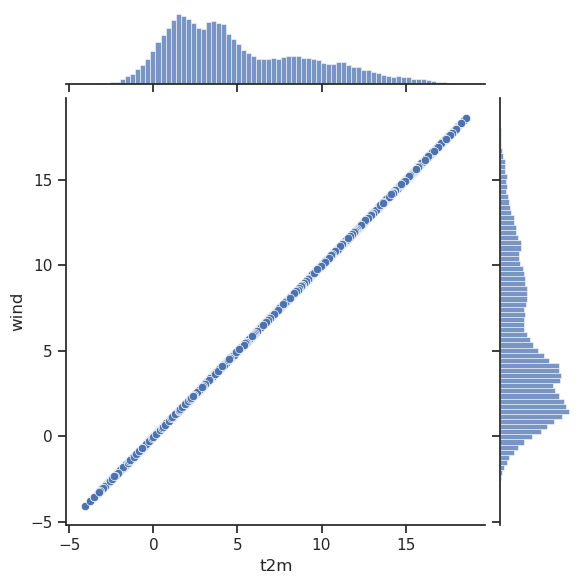

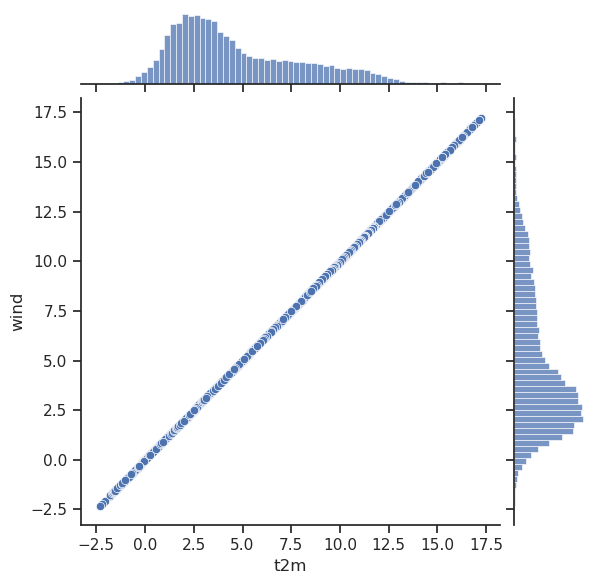

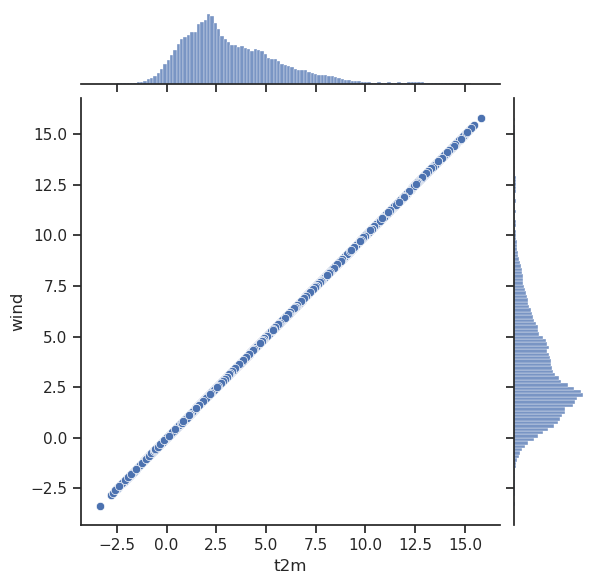

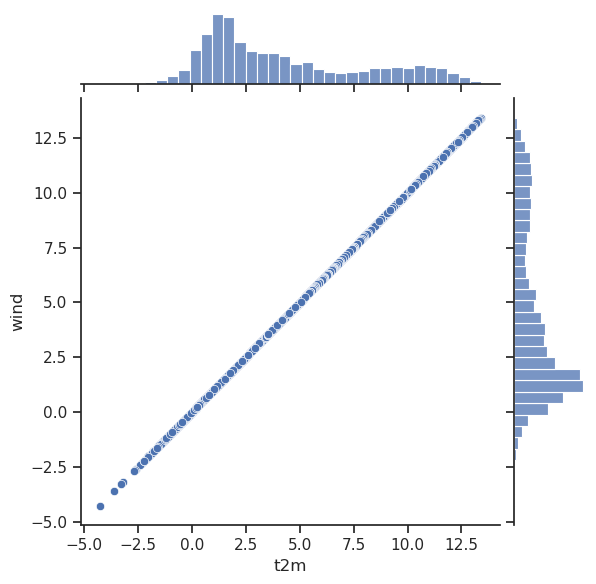

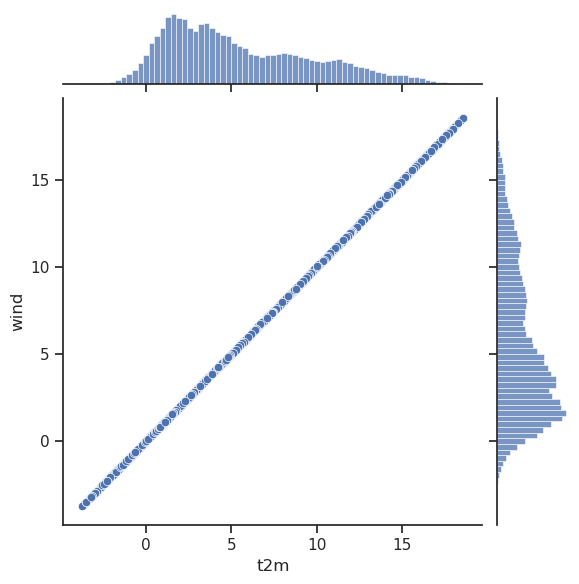

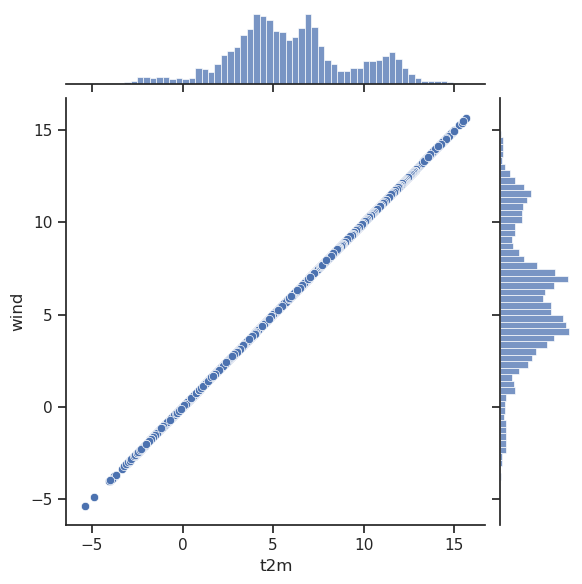

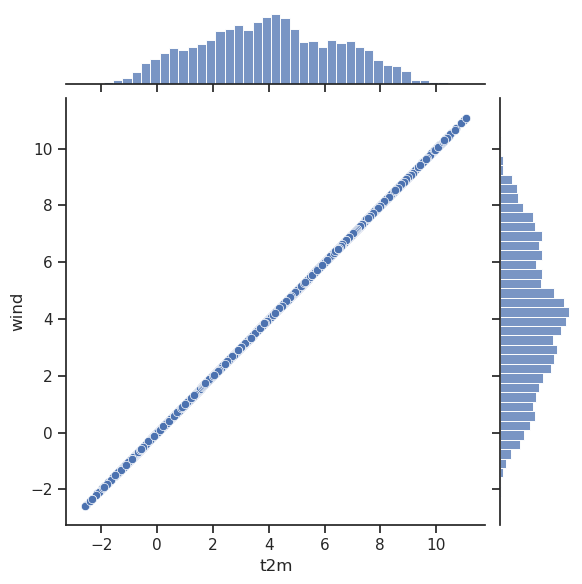

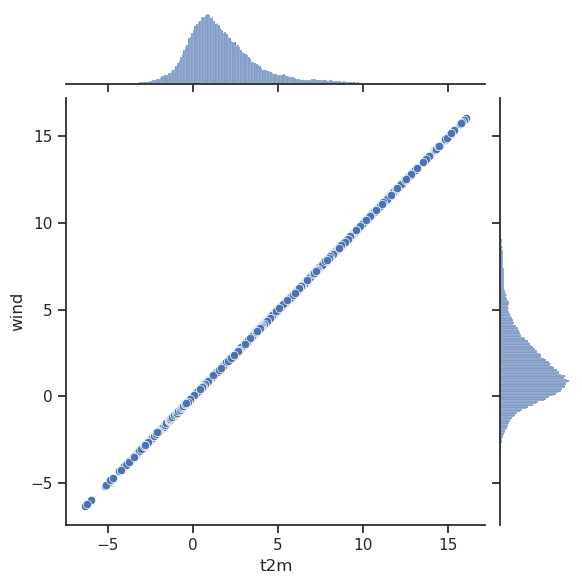

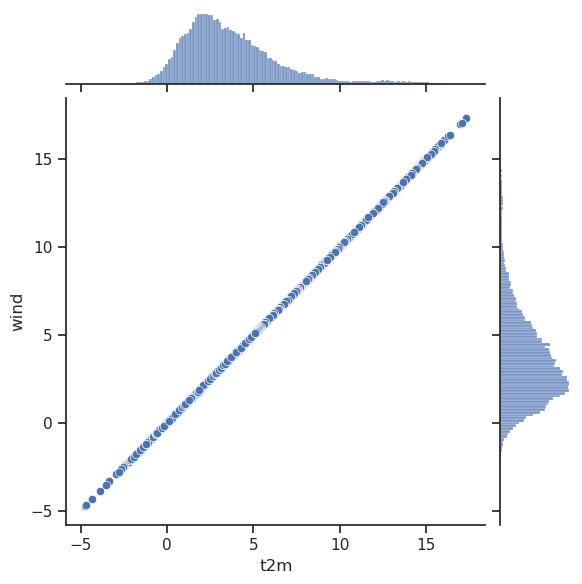

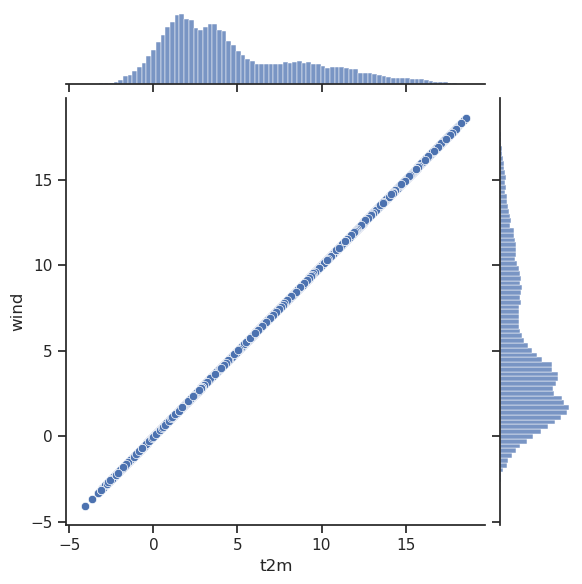

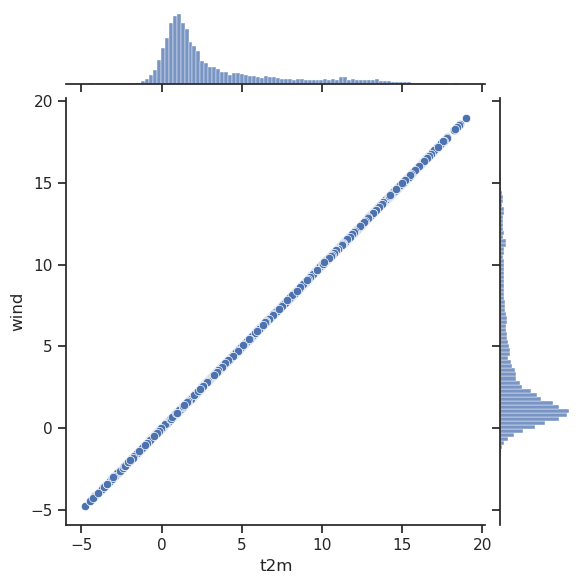

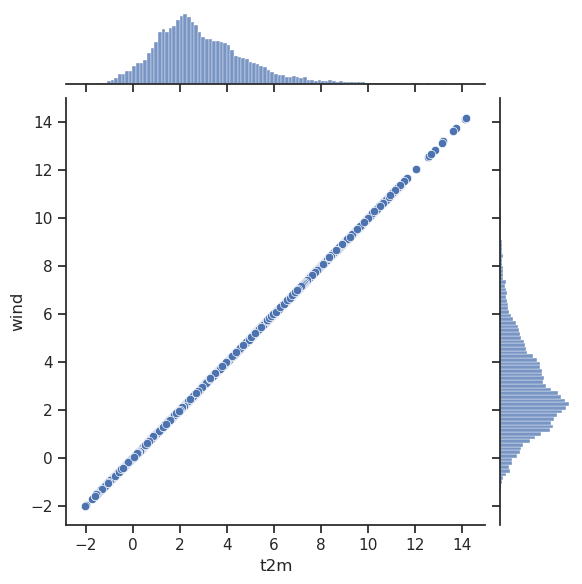

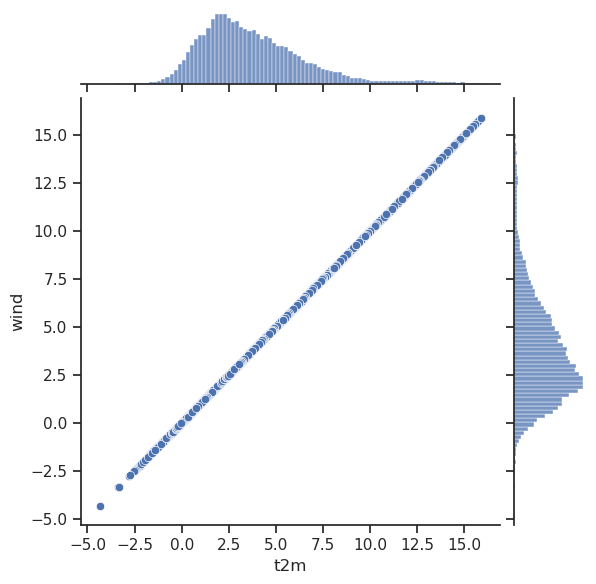

In [12]:
for i in range(len(states)):
    if len(state_t2m_anoms[i]) == 0:
        continue
    t2m = state_t2m_anoms[i].reshape((state_t2m_anoms[i].shape[0],1))
    wind = state_wind_anoms[i].reshape((state_wind_anoms[i].shape[0],1))
    total_table = np.hstack((t2m,wind))
    df = pd.DataFrame(total_table, columns=['t2m','wind'])
    g = sns.jointplot(
        data=df,
        x="t2m",
        y="wind",

    )


            t2m      wind
0      0.026978  0.250992
1      0.085999  0.086166
2     -0.032440  0.836764
3      0.381134  0.647109
4      0.869995  0.349759
...         ...       ...
79995  0.112429  0.112429
79996  0.964430  0.964430
79997  1.488697  1.488697
79998  1.750094  1.750094
79999  1.891724  1.891724

[80000 rows x 2 columns]


            t2m      wind
0      2.462875  2.462875
1      2.909534  2.909534
2      3.437951  3.437951
3      3.870817  3.870817
4      4.300183  4.300183
...         ...       ...
59995  1.641415  1.641415
59996  1.786585  1.786585
59997  2.061881  2.061881
59998  2.251955  2.251955
59999  2.509489  2.509489

[60000 rows x 2 columns]


/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


            t2m      wind
0      8.701905  8.701905
1      8.952595  8.952595
2      8.884836  8.884836
3      8.810694  8.810694
4      8.775015  8.775015
...         ...       ...
89995 -1.400479 -1.400479
89996 -1.460706 -1.460706
89997 -1.349662 -1.349662
89998 -1.068498 -1.068498
89999 -0.608500 -0.608500

[90000 rows x 2 columns]


/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


            t2m      wind
0     -0.809184 -0.809184
1     -0.770586 -0.770586
2     -0.890663 -0.890663
3     -0.786325 -0.786325
4     -0.697785 -0.697785
...         ...       ...
59995  5.647664  5.647664
59996  5.503187  5.503187
59997  5.360471  5.360471
59998  5.127036  5.127036
59999  4.946874  4.946874

[60000 rows x 2 columns]
            t2m      wind
0      1.313549  1.313549
1      1.487692  1.487692
2      1.766986  1.766986
3      1.814650  1.814650
4      2.156087  2.156087
...         ...       ...
59995 -2.821043 -2.821043
59996 -2.866854 -2.866854
59997 -2.729757 -2.729757
59998 -2.387016 -2.387016
59999 -2.296872 -2.296872

[60000 rows x 2 columns]
            t2m      wind
0      1.498522  1.498522
1      0.763382  0.763382
2      0.758646  0.758646
3      0.802228  0.802228
4      0.992564  0.992564
...         ...       ...
79995  0.716915  0.716915
79996  0.862703  0.862703
79997  1.097162  1.097162
79998  1.350954  1.350954
79999  1.465756  1.465756

[80000 rows

/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


            t2m      wind
0      1.447074  1.447074
1      1.129326  1.129326
2      0.887308  0.887308
3      0.934601  0.934601
4      0.958467  0.958467
...         ...       ...
29995  8.840883  8.840883
29996  8.813769  8.813769
29997  8.867081  8.867081
29998  8.814028  8.814028
29999  8.813537  8.813537

[30000 rows x 2 columns]
           t2m      wind
0     4.953784  4.953784
1     5.794287  5.794287
2     6.022404  6.022404
3     5.265257  5.265257
4     4.218383  4.218383
...        ...       ...
9995  4.673593  4.673593
9996  4.665763  4.665763
9997  4.683472  4.683472
9998  4.734514  4.734514
9999  4.764364  4.764364

[10000 rows x 2 columns]


/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


           t2m      wind
0     2.084464  2.084464
1     1.813499  1.813499
2     1.685062  1.685062
3     1.711075  1.711075
4     1.791614  1.791614
...        ...       ...
9995  2.207026  2.207026
9996  2.007276  2.007276
9997  1.783980  1.783980
9998  1.544996  1.544996
9999  1.365097  1.365097

[10000 rows x 2 columns]


/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


            t2m      wind
0      1.565518  1.565518
1      1.454624  1.454624
2      1.323770  1.323770
3      1.173460  1.173460
4      1.058596  1.058596
...         ...       ...
19995  3.526472  3.526472
19996  3.377106  3.377106
19997  3.279162  3.279162
19998  3.131902  3.131902
19999  3.021524  3.021524

[20000 rows x 2 columns]
            t2m      wind
0      5.750540  5.750540
1      6.617781  6.617781
2      6.945727  6.945727
3      5.859993  5.859993
4      5.037376  5.037376
...         ...       ...
29995 -1.397343 -1.397343
29996 -1.465568 -1.465568
29997 -1.462782 -1.462782
29998 -1.324944 -1.324944
29999 -1.248355 -1.248355

[30000 rows x 2 columns]
            t2m      wind
0     -2.055013 -2.055013
1     -2.171427 -2.171427
2     -2.242632 -2.242632
3     -2.186518 -2.186518
4     -2.074624 -2.074624
...         ...       ...
69995  5.703794  5.703794
69996  5.740596  5.740596
69997  5.545093  5.545093
69998  5.206686  5.206686
69999  4.914985  4.914985

[70000 rows

/data/keeling/a/rct4/anaconda3/envs/workenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


            t2m      wind
0      2.747200  2.747200
1      2.814736  2.814736
2      2.742082  2.742082
3      2.542408  2.542408
4      2.276984  2.276984
...         ...       ...
49995  0.989259  0.989259
49996  1.595294  1.595294
49997  1.893685  1.893685
49998  1.788146  1.788146
49999  1.773714  1.773714

[50000 rows x 2 columns]


KeyboardInterrupt: 

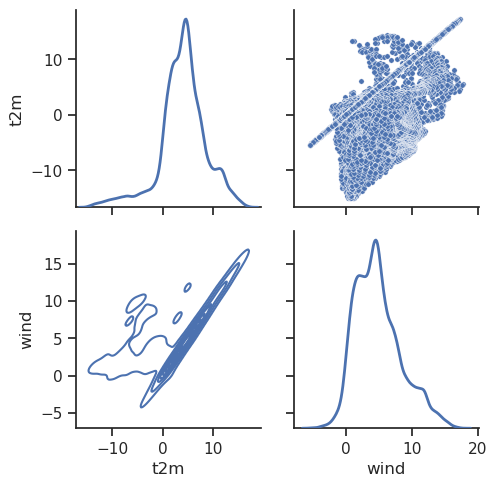

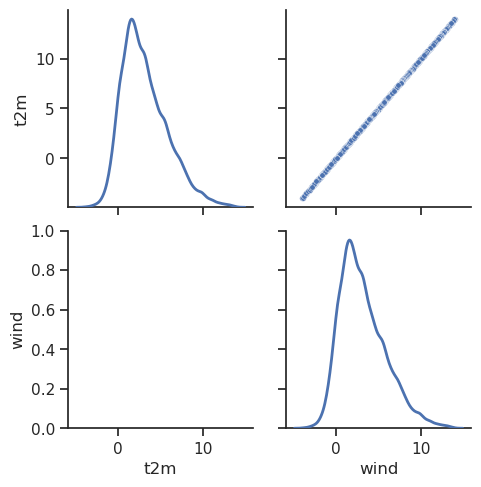

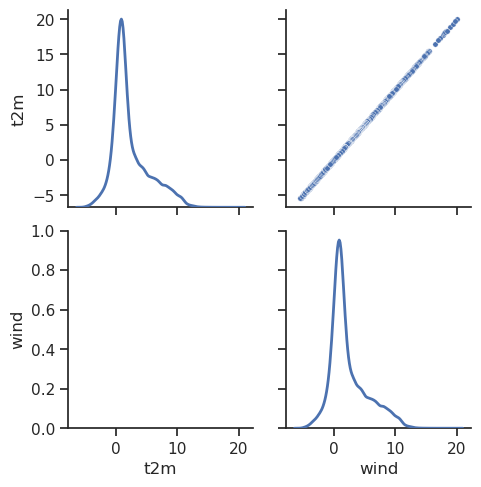

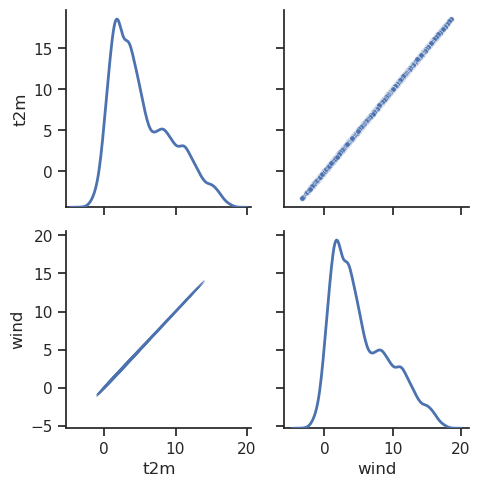

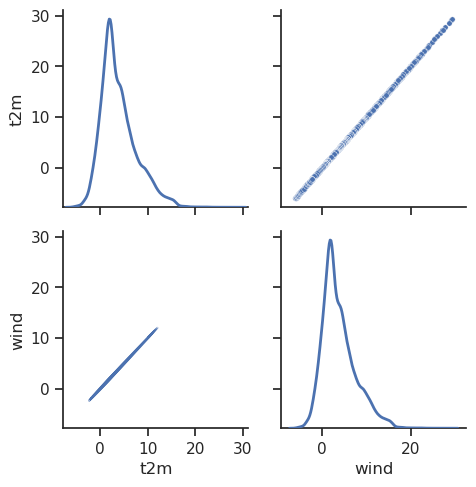

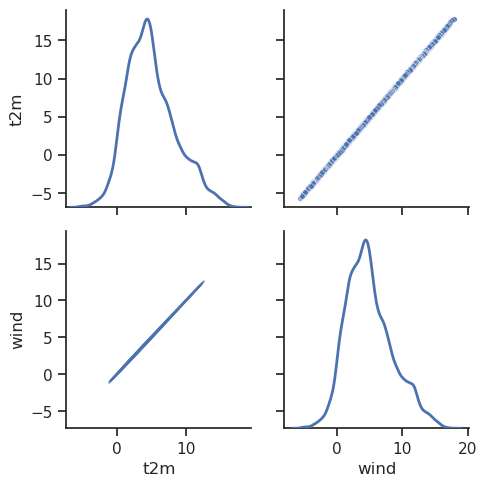

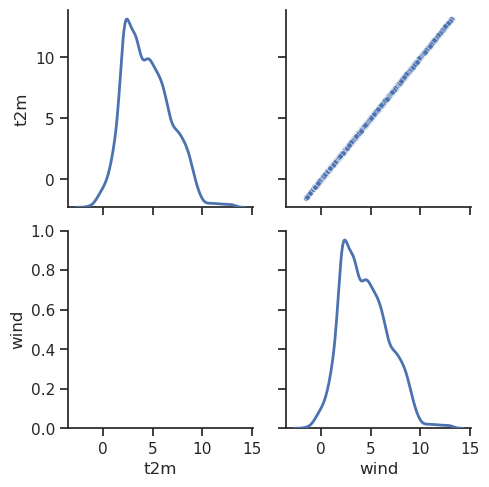

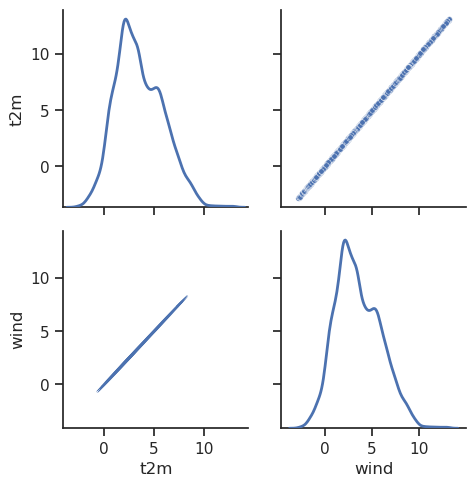

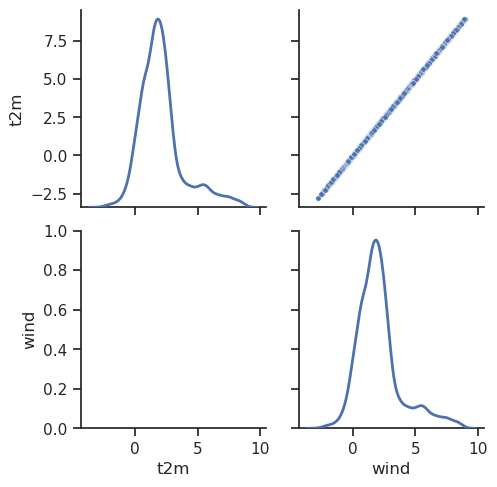

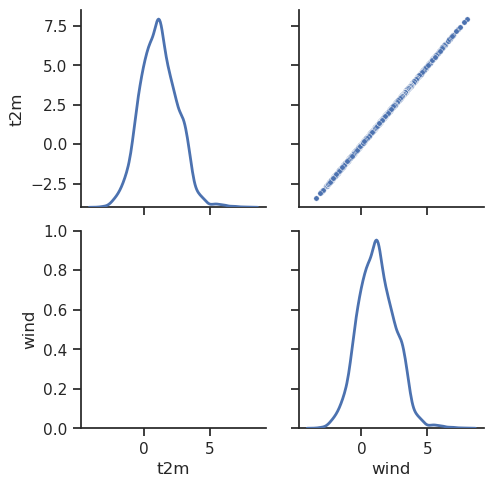

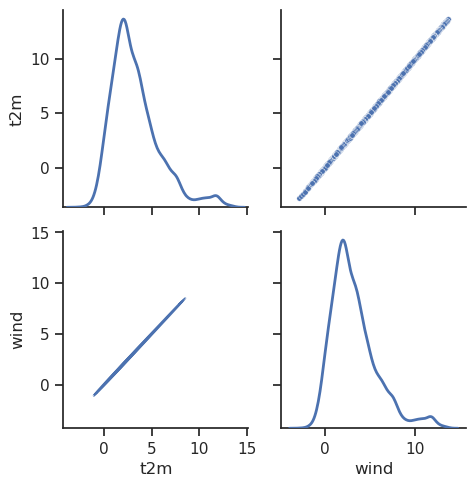

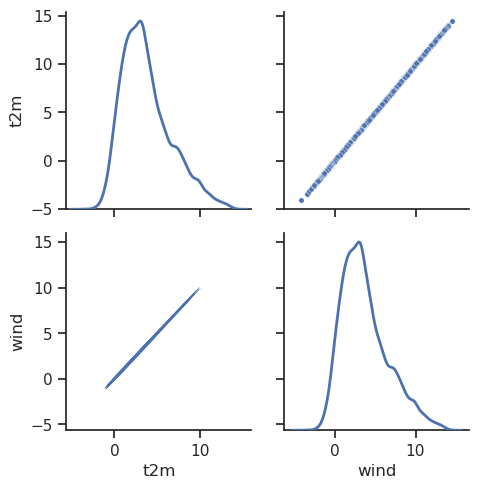

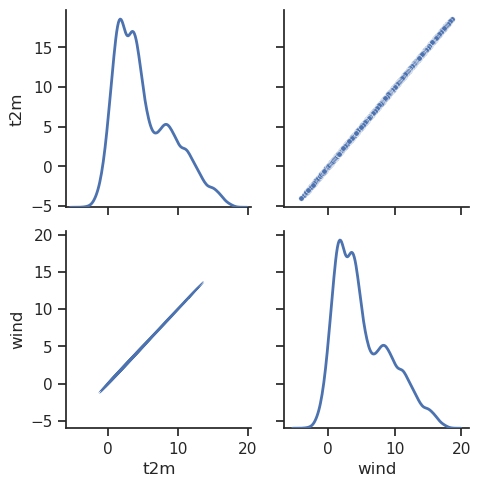

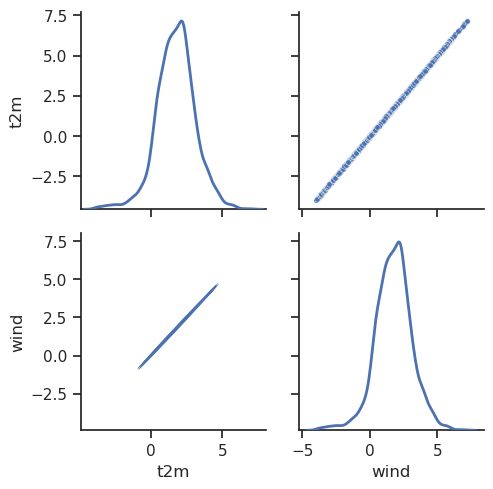

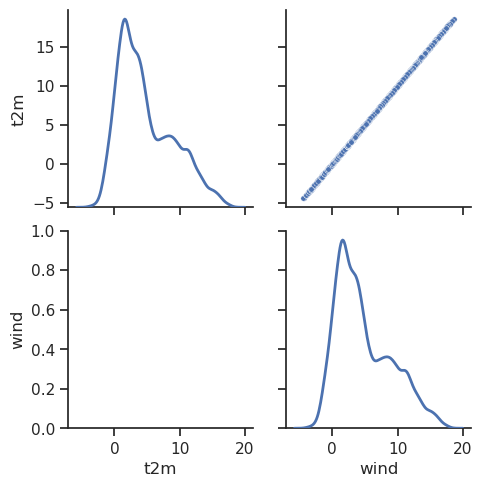

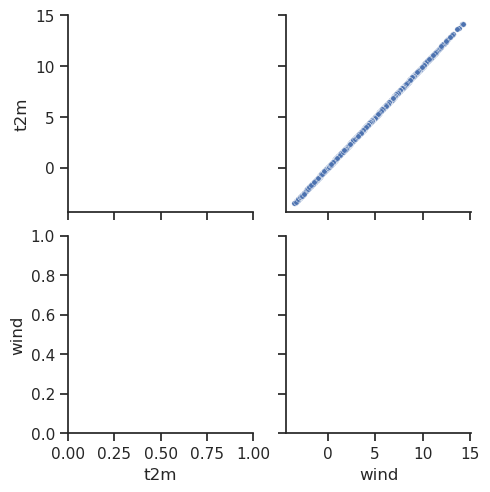

In [13]:
for i in range(len(states)):
    if len(state_t2m_anoms[i]) == 0:
        continue
    t2m = state_t2m_anoms[i].reshape((state_t2m_anoms[i].shape[0],1))
    wind = state_wind_anoms[i].reshape((state_wind_anoms[i].shape[0],1))
    total_table = np.vstack((t2m,wind))
    df = pd.DataFrame(total_table, columns=['t2m','wind'])
    # print(df)
    g = sns.PairGrid(df, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, 2)